# Libraries

In [1]:
import os
import re
import string
from os import listdir
from os.path import isfile, join
import pandas
import numpy as np
import random
import tika
import requests
from tika import parser
import pandas as pd

import spacy
nlp_nor = spacy.load("nb_core_news_sm")
nlp_eng = spacy.load("en_core_web_sm")
#nlp.max_length = 3000000
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from nltk.classify.scikitlearn import SklearnClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score


import matplotlib.pyplot as plt
import seaborn as sns
import googletrans
from googletrans import Translator

import nltk
from nltk.corpus import stopwords
from nltk.corpus import stopwords as nltk_stop
from nltk.tokenize import TweetTokenizer
import string
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()


from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.preprocessing import FunctionTransformer
from sklearn.linear_model import SGDClassifier
from sklearn.semi_supervised import SelfTrainingClassifier
from sklearn.semi_supervised import LabelSpreading
from sklearn.utils import shuffle


import googletrans
from googletrans import Translator
translator = Translator()

stop_words_no = set(nltk_stop.words('norwegian'))
stop_words_en = set(nltk_stop.words('english'))


import nlpaug.augmenter.char as nac
import nlpaug.augmenter.word as naw
import nlpaug.augmenter.sentence as nas
import nlpaug.flow as nafc
from nlpaug.util import Action

import time
#shuffeling the data frame
from sklearn.utils import shuffle
from nltk.tokenize import word_tokenize
aug = naw.SynonymAug()


from tensorflow.python.keras import models
from tensorflow.python.keras.layers import Dense
from tensorflow.python.keras.layers import Dropout
import tensorflow as tf
from langdetect import detect
from sklearn.feature_selection import f_classif
from tensorflow.keras import layers
from tensorflow.keras import regularizers

import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns

import googletrans
from googletrans import Translator

import nltk
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.corpus import stopwords as nltk_stop
from nltk.tokenize import TweetTokenizer
import string



nltk.download('wordnet')
nltk.download('omw-1.4')
word_net = nltk.WordNetLemmatizer()

from sklearn.feature_selection import SelectFromModel
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc


[nltk_data] Downloading package punkt to /Users/tt/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/tt/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /Users/tt/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


* List of which libraries used in this project - F.example - nltk, spcay with a little more definitions
* List the abrvigations used for example - ML, CART, EDA

# Functions

In [2]:
## Created system-code liste from "SYSTEMKODELIST NS3451" and called "systemCodeListe.csv"
# DataFrame for NS3451
NS3451 = pd.read_csv("systemCodeList.csv", index_col=False)

In [3]:
# Collect the list of system-code
#import os
#os.mkdir("NS3451")
#!cd NS3451
#!pwd

In [4]:
#for i in NS3451_list:
#    os.mkdir(i)

In [5]:
class reader:    
    # This def will be used to read and return differen type files
    def generalView(self, path):
        f_doc = []
        f_pdf = []
        f_xlsx = []
        f_jpg = []
        f_png = []

        type_others = []
        others = []
        total = []
        counter = 0

        for dirpath, dirnames, files in os.walk(path):
            if files:
                #print(dirpath, 'has files')
                for file in files:
                    if file == '.DS_Store':
                        continue
                    else:
                        if file.endswith('.doc') or file.endswith('.doc'.upper()) or file.endswith('.docx') or file.endswith('.docx'.upper()):
                            f_doc.append(dirpath+'/'+file)
                        elif file.endswith('.pdf') or file.endswith('.pdf'.upper()):
                            f_pdf.append(dirpath+'/'+file)
                        elif file.endswith('.xlsx') or file.endswith('.xlsx'.upper()):
                            f_xlsx.append(dirpath+'/'+file)
                        elif file.endswith('.jpg') or file.endswith('.jpg'.upper()):
                            f_jpg.append(dirpath+'/'+file)
                        elif file.endswith('.png') or file.endswith('.png'.upper()) :
                            f_png.append(dirpath+'/'+file)
                        else:
                            # Could have used re
                            if file[-3] == '.' and file[-3:] not in type_others:
                                type_others.append(file[-3:])
                            elif file[-4:] not in type_others:
                                type_others.append(file[-4:])
                            others.append(file)
                        counter += 1

            if not files:
                #print(dirpath, 'does not have files')
                continue
        
        return f_doc, f_pdf, f_xlsx, f_jpg, f_png, others, counter
    
    # Will use to see in percentage form
    def printerOfFiles(self, f_doc, f_pdf, f_xlsx, f_jpg, f_png, others, counter):
        print('Total number of files are:- ', counter)
        print('DOC type --> ',len(f_doc), '-->',  '{:.2f}'.format(len(f_doc)*100/counter), '%')
        print('PDF type --> ',len(f_pdf), '-->', '{:.2f}'.format(len(f_pdf)*100/counter), '%')
        print('XLSX type --> ',len(f_xlsx), '-->', '{:.2f}'.format(len(f_xlsx)*100/counter), '%')
        print('JPG type --> ',len(f_jpg), '-->', '{:.2f}'.format(len(f_jpg)*100/counter), '%')
        print('PNG type --> ',len(f_png),  '-->', '{:.2f}'.format(len(f_png)*100/counter), '%')
        print('{:.2f}'.format(len(others)*100/counter), '%')
        #print(len(type_others))
        #print(type_others)
    #finds match of the labels in a given file
    
    def findMatch(self, text):
        #print(text)
        # pattern, can be many --TBD
        pattern = [ "(\d{3}).(\d{2})=(\d{3}).(\d{3})-(\D{0,3}\d{0,3}\D{0,3})"]
        matched_result = []

        for i in pattern:
            try:
                result = re.search(i, text).group()
            except AttributeError:
                result = re.search(i, text)

        if result is not None:
            if len(result) > 21:
                result = result[:21]
            matched_result.append(result)

            return matched_result[0]
        else:
            return None
        
    
    # prints out the label in the structure part dataset
    def labelFinder(self, type_doc):
        target = self.findMatch(type_doc)
        return target
  
    # used from the function below, for non emp
    def forNonEmptyPdfPages(self, file):
        result = parser.from_file(file)
        text = result['content'][:].strip()
        return text
  
    # for structured/unstructured pdf for example
    def pdfPartToDataFrame(self, pdf):
        
        # contains the content of each file
        targets = []
        texts = []
        # contains the index of empty or undefined texts
        index_for_emp_pdf = []
        counter = 0

        for i in range(len(pdf)):
            result = parser.from_file(pdf[i])
            text = result['content']

            if text is not None:
                target = self.labelFinder(pdf[i])
                new_compact_text = self.forNonEmptyPdfPages(pdf[i])
                targets.append(target)
                texts.append(new_compact_text)
            else:
                # shows how many unreadable pdf file I have(and those are 73 out of 1355)
                counter += 1
                index_for_emp_pdf.append(i)
                continue
        list_of_tuples = list(zip(texts, targets))
        # creating dataFrame
        df = pd.DataFrame(list_of_tuples, columns = ['Text', 'Target'])
        return df
    
# prefered in the previous versions
class dataPreparation:
    
    def punctuationsRemoval(self, data):
        for punct in string.punctuation:
            data = data.replace(punct, "")
        return data
    
    def token(self, data):
        
        # data without stop-words and lemmatization, for example "ostkake"->"ostkak"
        data['stop_Lemma'] = data.Text.apply(lambda text: " ".join(each_token.lemma_ for each_token in nlp(text) if not each_token.is_stop))
        # remove the punctuation 
        data['clean'] = data['stop_Lemma'].apply(self.punctuationsRemoval)
        #for i in range(len(data)):
        #    data["clean"][i] = str(nlp(data["clean"][i]))
        return data
    
    def cleanerForSingle(self, text):
        for token in text:
            t = self.punctuationsRemoval(text).lemma_
            print(t)
            
class structuringAutoClassification:
    #One init here
    def forNonEmptyPdfPagesTWO(self, file):
        result = parser.from_file(file)
        text = result['content'][:].strip()
        return text
    
    def systemCode(self, data):
        #print(data)
        pattern = ["(\d{2})","(\d{3})","(\d{4})"]
        #test = "A232-102-1 Plan 2. etg - del 1_tegning"
        tot_res = []
        extract_list_of_total = []
        for i in pattern:
            result = re.findall(i, data)
            tot_res.append(result)

        for n in tot_res:
            for nu in n:
                if (nu.startswith("1") or nu.startswith("0")) and (len(nu) > 1):
                    continue
                elif (len(nu) == 3 and nu.endswith("0") or nu[1] == str(0)):
                    continue
                elif (len(nu) > 3 or int(nu) > 790):
                    continue
                else:
                    extract_list_of_total.append(int(nu))

        #np.unique(extract_list_of_total)
        return np.unique(extract_list_of_total), data
    
    # pickes out the right code for ræling based on file name and datafram for NS3451
    def pickRightCode(self, system_code, code_of_list, text):
        if len(code_of_list) == 1:
            return code_of_list[0]
        elif len(code_of_list) == 0:
            return None
        else:
            found_code = []
            for i in range(len(system_code)):
                for co in code_of_list:
                    # Check if I've striped version of both system_code and code_of_list
                    if system_code.ID[i] == str(co):
                        name = system_code.ID_Navn[i]
                        if name in text:
                            found_code.append(system_code.ID[i])
                        else:
                            found_code.append(code_of_list[-1])
                        #return system_code.ID[i]

                    else:
                        #print(co)
                        continue
            return found_code
    
    
    def pdfPartToDataFrameTwo(self, pdf, system_code):
        targets = []
        texts = []
        orginal_position = []
        for i in range(len(pdf)):
            result = parser.from_file(pdf[i])
            text = result['content']
            if text is not None:
                code_of_list , t = self.systemCode(pdf[i])
                target = self.pickRightCode(system_code, code_of_list, t)
                #print(target)
                if isinstance(target, (int, np.integer)) or isinstance(target, str):
                    targets.append(target)
                elif isinstance(target, list):
                    if len(target) > 0:
                        targets.append(int(target[-1]))
                    else:
                        # Unclear 1
                        targets.append("Unclear 1")
                elif target is None:
                    targets.append("Unclear 2")
                else:
                    print(target, type(target))
                #if len(target) == 0:
                #    tar = "Unclear"
                #    targets.append(tar)
                #elif isinstance(target, int):
                    
                #else:
                #    tar = "Unclear"
                #targets.append(target)
                texts.append(self.forNonEmptyPdfPagesTWO(pdf[i]))
                orginal_position.append(i)
            else:
                continue
        list_of_tuples = list(zip(texts, targets, orginal_position))
        #print(len(texts), len(targets), len(orginal_position))
        #all_list = [texts, targets, orginal_position]
        df = pd.DataFrame(list_of_tuples, columns=["Text", "Target", "Orginal_Position"])
        return df

In [6]:
if __name__ == "__main__":
    # DataFrame for NS3451
    NS = "./systemCodeList.csv"
    # "systemCodeList.csv"
    system_code = pd.read_csv(NS , index_col=False)
    
    
    # path for structured data(from the first phase) -> structured
    # path One: "./Strukturerte_dokument/Interaxo-download"
    mypath_structured_1 = "./TOne/Strukturerte_dokument/Interaxo-download" 
    # path for structured data in Auto-classification (from the second phase) -> structured
    # path Two: "./ForAuto_klassifisering/Rælingen kommune - strukturert"
    mypath_structured_2A =   "./TThree/ForAuto_klassifisering/Rælingen_kommune_strukturert"
    mypath_structured_2B =   "./TThree/ForAuto_klassifisering_2/Rælingen_kommune_strukturert"
    mypath_structured_2C =   "./TThree/ForAuto_klassifisering_3/Rælingen_kommune_strukturert"
    mypath_structured_2D =   "./TThree/ForAuto_klassifisering_4/Rælingen_kommune_strukturert"
    mypath_structured_2E =   "./TThree/ForAuto_klassifisering_5/Rælingen_kommune_strukturert"
    # unsttuctured part of (from the first phase)-> unstructured
    # path Three: "./UnstructuredDataSets"

    # Desktop/Aut/TTwo/Unstrukturerte_dokument/Ustrukturerte_dokument_1
    mypath_unstructured_3A = "./TTwo"
    #mypath_unstructured_3B = "./TTwo/Unstrukturerte_dokument/Ustrukturerte_dokument_2"
    #mypath_unstructured_3C = "./TTwo/Unstrukturerte_dokument/Ustrukturerte_dokument_3"
    #mypath_unstructured_3D = "./TTwo/Unstrukturerte_dokument/Ustrukturerte_dokument_4"
    #mypath_unstructured_3E = "./TTwo/Unstrukturerte_dokument/Ustrukturerte_dokument_5"
    #mypath_unstructured_3F = "./TTwo/Unstrukturerte_dokument/Ustrukturerte_dokument_6"
    
    # unstructured part of autoclassification(from the second phase) -> unstructured
    # path Four: "./Rælingen_ustrukturert"
    mypath_unstructured_from_auto_4A = "./TThree/ForAuto_klassifisering/Rælingen_kommune_ustrukturert"
    mypath_unstructured_from_auto_4B = "./TThree/ForAuto_klassifisering_2/Rælingen_kommune_ustrukturert"
    mypath_unstructured_from_auto_4C = "./TThree/ForAuto_klassifisering_3/Rælingen_kommune_ustrukturert"
    mypath_unstructured_from_auto_4D = "./TThree/ForAuto_klassifisering_4/Rælingen_kommune_ustrukturert"
    mypath_unstructured_from_auto_4E = "./TThree/ForAuto_klassifisering_5/Rælingen_kommune_ustrukturert"##<----------
    
    
    # Classes
    read = reader()
    prep = dataPreparation()
    AutoClass = structuringAutoClassification()
    
    # Structured
    print("*"*30, "Structured","*"*30 )
    doc_1, pdf_1, xlsx_1, jpg_1, png_1, others_1, counter_1 = read.generalView(mypath_structured_1)
    read.printerOfFiles(doc_1, pdf_1, xlsx_1, jpg_1, png_1, others_1, counter_1)
    #df_one_1 = read.pdfPartToDataFrame(pdf_1)
    #df_1 = prep.token(df_one)
    
    print("*"*30, "Structured","*"*30 )
    # Structured
    doc_2A, pdf_2A, xlsx_2A, jpg_2A, png_2A, others_2A, counter_2A = read.generalView(mypath_structured_2A)
    doc_2B, pdf_2B, xlsx_2B, jpg_2B, png_2B, others_2B, counter_2B = read.generalView(mypath_structured_2B)
    doc_2C, pdf_2C, xlsx_2C, jpg_2C, png_2C, others_2C, counter_2C = read.generalView(mypath_structured_2C)
    doc_2D, pdf_2D, xlsx_2D, jpg_2D, png_2D, others_2D, counter_2D = read.generalView(mypath_structured_2D)
    doc_2E, pdf_2E, xlsx_2E, jpg_2E, png_2E, others_2E, counter_2E = read.generalView(mypath_structured_2E)
    
    
    doc_2 = doc_2A + doc_2B + doc_2C + doc_2D + doc_2E
    pdf_2 = pdf_2A + pdf_2B + pdf_2C + pdf_2D + pdf_2E
    xlsx_2 = xlsx_2A + xlsx_2B + xlsx_2C + xlsx_2D + xlsx_2E
    jpg_2 = jpg_2A + jpg_2B + jpg_2C + jpg_2D + jpg_2E
    png_2 = png_2A + png_2B + png_2C + png_2D + png_2E
    others_2 = others_2A + others_2B + others_2C + others_2D + others_2D
    counter_2 = counter_2A + counter_2B + counter_2C + counter_2D + counter_2E
    
    read.printerOfFiles(doc_2, pdf_2, xlsx_2, jpg_2, png_2, others_2, counter_2)
    #df_two_2 = read.pdfPartToDataFrame(pdf_2)
    #df_2 = prep.token(df_two)
    
    print("*"*30, "Unstructured","*"*30 )
    # Unstructured
    doc_3A, pdf_3A, xlsx_3A, jpg_3A, png_3A, others_3A, counter_3A = read.generalView(mypath_unstructured_3A)
    #doc_3B, pdf_3B, xlsx_3B, jpg_3B, png_3B, others_3B, counter_3B = read.generalView(mypath_unstructured_3B)
    #doc_3C, pdf_3C, xlsx_3C, jpg_3C, png_3C, others_3C, counter_3C = read.generalView(mypath_unstructured_3C)
    #doc_3D, pdf_3D, xlsx_3D, jpg_3D, png_3D, others_3D, counter_3D = read.generalView(mypath_unstructured_3D)
    #doc_3E, pdf_3E, xlsx_3E, jpg_3E, png_3E, others_3E, counter_3E = read.generalView(mypath_unstructured_3E)
    #doc_3F, pdf_3F, xlsx_3F, jpg_3F, png_3F, others_3F, counter_3F = read.generalView(mypath_unstructured_3F)
    
    doc_3 = doc_3A #+ doc_3B + doc_3C + doc_3D + doc_3E + doc_3F
    pdf_3 = pdf_3A #+ pdf_3B + pdf_3C + pdf_3D + pdf_3E + pdf_3F
    xlsx_3 = xlsx_3A #+ xlsx_3B + xlsx_3C + xlsx_3D + xlsx_3E + xlsx_3F
    jpg_3 = jpg_3A #+ jpg_3B + jpg_3C + jpg_3D + jpg_3E + jpg_3F
    png_3 = png_3A #+ png_2B + png_3C + png_3D + png_3E + jpg_3F
    others_3 = others_3A #+ others_3B + others_3C + others_3D + others_3E + others_3F
    counter_3 = counter_3A #+ counter_3B + counter_3C + counter_3D + counter_3E + counter_3F
        
    
    read.printerOfFiles(doc_3, pdf_3, xlsx_3, jpg_3, png_3, others_3, counter_3)
    #df_three_3 = AutoClass.pdfPartToDataFrameTwo(pdf_3, system_code)
    #df_3 = prep.token(df_three)
    
    print("*"*30, "Unstructured","*"*30 )
    # Unstructured
    
    doc_4A, pdf_4A, xlsx_4A, jpg_4A, png_4A, others_4A, counter_4A = read.generalView(mypath_unstructured_from_auto_4A)
    doc_4B, pdf_4B, xlsx_4B, jpg_4B, png_4B, others_4B, counter_4B = read.generalView(mypath_unstructured_from_auto_4B)
    doc_4C, pdf_4C, xlsx_4C, jpg_4C, png_4C, others_4C, counter_4C = read.generalView(mypath_unstructured_from_auto_4C)
    doc_4D, pdf_4D, xlsx_4D, jpg_4D, png_4D, others_4D, counter_4D = read.generalView(mypath_unstructured_from_auto_4D)
    doc_4E, pdf_4E, xlsx_4E, jpg_4E, png_4E, others_4E, counter_4E = read.generalView(mypath_unstructured_from_auto_4E)
    
    
    doc_4 = doc_4A + doc_4B + doc_4C + doc_4D + doc_4E
    pdf_4 = pdf_4A + pdf_4B + pdf_4C + pdf_4D + pdf_4E
    xlsx_4 = xlsx_4A + xlsx_4B + xlsx_4C + xlsx_4D + xlsx_4E
    jpg_4 = jpg_4A + jpg_4B + jpg_4C + jpg_4D + jpg_4E
    png_4 = png_4A + png_4B + png_4C + png_4D + png_4E
    others_4 = others_4A + others_4B + others_4C + others_4D + others_4D
    counter_4 = counter_4A + counter_4B + counter_4C + counter_4D + counter_4E
    read.printerOfFiles(doc_4, pdf_4, xlsx_4, jpg_4, png_4, others_4, counter_4)
    
    #df_four_4 = AutoClass.pdfPartToDataFrameTwo(pdf_4, system_code)
    #df_4 = prep.token(df_four)
    
    
    
    #NOTE: dataFrame structured - Rælingen kommune
    #df_auto_struc = AutoClass.pdfPartToDataFrameTwo(pdf_2, system_code)
    #df_aut_ = prep.token(df_auto_struc)
    

****************************** Structured ******************************
Total number of files are:-  1409
DOC type -->  20 --> 1.42 %
PDF type -->  1361 --> 96.59 %
XLSX type -->  13 --> 0.92 %
JPG type -->  4 --> 0.28 %
PNG type -->  9 --> 0.64 %
0.14 %
****************************** Structured ******************************
Total number of files are:-  151
DOC type -->  6 --> 3.97 %
PDF type -->  130 --> 86.09 %
XLSX type -->  1 --> 0.66 %
JPG type -->  0 --> 0.00 %
PNG type -->  0 --> 0.00 %
7.28 %
****************************** Unstructured ******************************
Total number of files are:-  8146
DOC type -->  281 --> 3.45 %
PDF type -->  5840 --> 71.69 %
XLSX type -->  46 --> 0.56 %
JPG type -->  225 --> 2.76 %
PNG type -->  52 --> 0.64 %
20.89 %
****************************** Unstructured ******************************
Total number of files are:-  8204
DOC type -->  555 --> 6.76 %
PDF type -->  5605 --> 68.32 %
XLSX type -->  49 --> 0.60 %
JPG type -->  510 --> 6.22 %
PN

In [228]:
#df_one_1.to_pickle("./first_original_structured.pkl")
#df_two_2.to_pickle("./second_original_structured.pkl")
#df_three_3.to_pickle("./first_original_unstructured.pkl")
#df_four_4.to_pickle("./second_original_unstructured.pkl")


In [8]:
# Testing the original
#x = vectorizer.transform([df_one_1["Text"].iloc[0].lower()])
#print(clf_rf.predict(x)[0])

In [9]:
# function to create a proper index in the dataframe
def properIndex(dataFrame):
    ind = []
    for i in range(len(dataFrame)):
        ind.append(i)
    s = pd.Series(ind)
    dataFrame.set_index(s, inplace=True)
    return dataFrame


def punctuationsRemoval(data):
    for punct in string.punctuation:
        data = data.replace(punct, "")
    return data

#Stop words for multiple languages 
def stopWordsFor_MultiLang(data):
    for i in range(len(data)):
        data["text"].iloc[i] = data["text"].iloc[i].lower()
        if data["language"].iloc[i] == "Norwegian":
            text = word_tokenize(data["text"].iloc[i])
            text = [word for word in text if word not in stop_words_no]
            cleaned = " ".join(text)
            data["text"].iloc[i] = cleaned 
        else:
            text = word_tokenize(data["text"].iloc[i])
            text = [word for word in text if word not in stop_words_en]
            cleaned = " ".join(text)
            data["text"].iloc[i] = cleaned  
    return data

# can be used fro general tokization(in this case norwegian)
def token(data):
    # tokenization, stop words, lemma_
    # before stop_words taken away
    #data['stop_Lemma'] = data.text.apply(lambda text: " ".join(each_token.lemma_ for each_token in nlp(text) if not each_token.is_stop))
    # after stop_words taken away
    data['text_Lemma'] = data.text.apply(lambda text: " ".join(each_token.lemma_ for each_token in nlp_nor(text)))
    return data

# Language detector/
def language_detector(data):
    Norwegian = 0
    English = 0
    language_undetectable = 0
    error_ = []
    for i in range(len(data)):
        #print(df_Unlabeled_total.text[i])
        te = data["text"][i]  
        try:
            lang = detect(te)
            if lang == "no":
                Norwegian += 1
                data["language"][i] = "Norwegian"
            elif lang == "en":
                English += 1
                data["language"][i] = "English"
            else:
                pass
        except:
            error_.append(i)
    #print(Norwegian, English)
    return data

# 1 if the focus is only one language(Norwegian), 0 for multiple language, 2 focus in one language(English)
def language_excluder(data):
    for i in range(len(data)):
        # drops the rows with undetectable language
        if (data["language"].iloc[i] == "Norwegian") or (data["language"].iloc[i] == "English"):
            continue
        else:
            data.drop(i, inplace=True)
    return data

def language_excluder_english(data):
    for i in range(len(data)):
        
        if data["language"][i] == "Norwegian":
            continue
        else:
            data.drop(i, inplace=True)
    return data


def language_translator(data, languageFrom, dest_, languageToSave):
    for i in range(len(data)):
        if (data["language"][i] == languageFrom) and isinstance(data.text[i], str):
            #translate to dest_ language
            translated_to_ = translator.translate(str(data.text[i]), dest= 'no')
            data["text"][i] = translated_to_.text
            data["language"][i] = languageToSave
        else:
            continue
    return data   
    

# cleaning datafrme
def cleaning_dataframeColumns(dataframe, columnAsString):    
    for i in range(len(dataframe)):
        dataframe[columnAsString][i] = dataframe[columnAsString][i].strip().lower()
        dataframe[columnAsString][i] = re.sub("\n+", "", dataframe[columnAsString][i])
        dataframe[columnAsString][i] = re.sub("\t", "", dataframe[columnAsString][i])
        dataframe[columnAsString][i] = re.sub(" \d+", "", dataframe[columnAsString][i]) # removing numbers
        dataframe[columnAsString][i] = punctuationsRemoval(dataframe[columnAsString][i])    
        dataframe[columnAsString][i] = re.sub(r'#', '', dataframe[columnAsString][i])
        dataframe[columnAsString][i] = re.sub(r'^RT[\s]+', '', dataframe[columnAsString][i])
        dataframe[columnAsString][i] = re.sub(r'\$\w*', '', dataframe[columnAsString][i])
        dataframe[columnAsString][i] = re.sub(r'https?:\/\/.*[\r\n]*', '', dataframe[columnAsString][i])
        dataframe[columnAsString][i] = re.sub(r'\d+', ' ', dataframe[columnAsString][i])
        dataframe[columnAsString][i] = re.sub(r"\n|(\\(.*?){)|}|[!$%^&*#()_+|~\-={}\[\]:\";'<>?,.\/\\]|[0-9]|[@]", ' ', dataframe[columnAsString][i])
        #dataframe[columnAsString] = dataframe[columnAsString].replace(r'\s+|\\n', ' ', regex=True)
    return dataframe

def cleaner_two(data):
    data.text = data.text.apply(lambda x: re.sub(r'@[\S]+', '', str(x)))
    data.text = data.text.apply(lambda x: re.sub(r'&[\S]+?;', '', str(x)))
    data.text = data.text.apply(lambda x: re.sub(r'#', ' ', str(x)))
    data.text = data.text.apply(lambda x: re.sub(r'(\bRT\b|\bQT\b)', '', str(x)))
    data.text = data.text.apply(lambda x: re.sub(r'http[\S]+', '', str(x)))
    data.text = data.text.apply(lambda x: re.sub(r'\w*\d\w*', r'', str(x)))
    # calling number remover for second time
    data.text = data.text.apply(lambda x: re.sub(' \d+', "", str(x)))
    #data.text = data.text.apply(lambda x: re.sub(r"\u", "", str(x)))
    data.text = data.text.apply(lambda x: re.sub(r"®", "", str(x)))
    
    #ded.strings.str.replace('[^a-zA-Z0-9]', '')
    # removing again alphanumeric
    data.text = data.text.apply(lambda x: re.sub(r"[^a-zA-Z0-9]", " ", str(x)))

    # remove any double or more whitespaces to single whitespaces in claim column
    data.text = data.text.apply(lambda x: re.sub(r'\s\s+', ' ', str(x)))
    data.text = data.text.apply(lambda x: re.sub(r'(\A\s+|\s+\Z)', '', str(x)))
    return data


def punctuationsRemoval_two(text):
    text  = "".join([char for char in text if char not in string.punctuation])
    text = re.sub('[0-9]+', '', text)
    return text

def wordLemmatizer(text):
    text = [word_net.lemmatize(word) for word in text]
    return text
    

# Runs for first time on the original data sets.
def agumentation_systemCode(data, system_code, min_length_words = 100, number_samples_to_add = 10, number_word_to_change = 5):
    index_ = []
    
    for i in range(len(data)):
        if data["system"][i] == system_code:
            tok = word_tokenize(data["text"][i])
            tok = tok[:]  # first round :300, 2nd :500, 3r half token:len(token) # len(tok)//2:len(tok)-1, :len(tok)//2
            if len(tok) > min_length_words:
                index_.append(i)
    for i in range(number_samples_to_add):
        
        random_words = []
        index_agumented_word = []
        agumented_words = []
        # choose random sampel that belongs to the system code
        # choose number_word_to_change random words from that sampel
        # find their sysnonym and replace in the place of original words
        # give system code which belongs to the original system code
        
        random_index = random.randint(0, len(index_)-1)
        text_ = word_tokenize(data["text"][index_[random_index]])
        language_ = data["language"][index_[random_index]]
        
        if len(text_) > number_word_to_change:
            while len(random_words) < number_word_to_change:
                w = random.choice(text_)
                if w not in random_words:

                    if language_ == "Norwegian":
                        # translate to english
                        
                        translated_word_en = translator.translate(w, dest="en")
                        time.sleep(0.5)
                        #print(translated_word_en.text)
                        # do agumentation on the translated data
                        agumented_data = aug.augment(translated_word_en.text)
                        #print("Agumented: ", agumented_data)
                        # translate back to the origin
                        translated_word_origin = translator.translate(agumented_data, dest="no")
                        time.sleep(0.5)
                        agumented_words.append(translated_word_origin.text)
                        #time.sleep(0.5)
                    else:
                        # do agumentation on the translated data
                        agumented_data = aug.augment(w)
                        #print("Agumented: ", agumented_data)
                        # translate back to the origin
                        translated_word_origin = agumented_data

                        agumented_words.append(translated_word_origin)
                    #print(w)
                    random_words.append(w)
                
        for w in random_words:
            idx = text_.index(w)
            index_agumented_word.append(idx)
        for i, y in zip(index_agumented_word, agumented_words):
                text_[i] = y
        new_text = " ".join(text_)
        data = data.append({'text': new_text, 'system': system_code, 'language': language_}, ignore_index=True)
    return data


def wordAugOnSamples(new_df, max_num_samples = 200, min_num_samples= 0, loop = 2):
    
    system_code_with_less_samples = []

    system_codes_number_samples = list(new_df["system"].value_counts()) # the number of samples from max to min
    system_codes = list(new_df["system"].value_counts().keys()) # system code that belong to the samples
    for n_samples, sys_cod in zip(system_codes_number_samples, system_codes):
        if n_samples < max_num_samples  and n_samples > 45:
            #print(sys_cod, type(sys_cod), n_samples, type(n_samples))
            system_code_with_less_samples.append(sys_cod)
    print(system_code_with_less_samples)
            
    loop_counter = 0
    while (len(system_code_with_less_samples) > 0) and (loop_counter < loop):
        for i, sys in enumerate(system_code_with_less_samples[:]):
            try:
                new_df = agumentation_systemCode(new_df, sys, min_length_words = 100, number_samples_to_add = 20, number_word_to_change = 50)
                print(i, sys)
            except:
                print("not preformed: ", sys)

        system_codes_number_samples = list(new_df["system"].value_counts()) # the number of samples from max to min
        system_codes = list(new_df["system"].value_counts().keys()) # system code that belong to the samples
        for n_samples, sys_cod in zip(system_codes_number_samples, system_codes):
            if n_samples < max_num_samples  and n_samples > min_num_samples:
                #print(sys_cod, type(sys_cod), n_samples, type(n_samples))
                system_code_with_less_samples.append(sys_cod)
        loop_counter += 1
        print(system_code_with_less_samples)
    return new_df


# Arranging and Pre-processing text data

#### reading the saved pkls from the original data

In [10]:
# reading the files
df_one = pd.read_pickle("./first_original_structured.pkl")
df_two = pd.read_pickle("./second_original_structured.pkl")
# df_one and df_two >> new_df.csv( where the size is increased over 5K)
df_three = pd.read_pickle("./first_original_unstructured.pkl")
df_four = pd.read_pickle("./second_original_unstructured.pkl")

#### Arranging the dataFrame

In [11]:
# start to gather the labels data from the unlabeled part as well
extrat_text = []
extract_code = []

# applies for df_three first
for i in range(len(df_three)):
    if isinstance(df_three.Target[i], np.integer):
        extrat_text.append(df_three.Text[i])
        extract_code.append(df_three.Target[i])
        df_three.drop(i, inplace=True)
        
# creating df
extracted_df = pd.DataFrame({"text":extrat_text, "system":extract_code})



df_st1 = df_one.copy()
df_st1.rename(columns={"Text":"originaltext", "Target":"target"}, inplace=True)
df_all_st = df_st1

#having the proper index number
df_all_st = properIndex(df_all_st)
# Keeping the targets as string
df_all_st["target"] = df_all_st["target"].astype(str)

#keeping only the 3 digit of the sys code
for i in range(len(df_all_st)):
    #df_all_st["target"][i].strip()
    df_all_st["target"][i] = df_all_st["target"][i][7:10]

#this is the original datasets for the structured part
df_all_original_structured = df_all_st[["originaltext", "target"]] 
df_all_original_structured.rename(columns={"originaltext":"text", "target":"system"}, inplace=True)

# data frame for all labeled data
all_labeled_frames = [df_all_original_structured, extracted_df]
all_original_labeled = pd.concat(all_labeled_frames)

# replacing \s and new \n 
all_original_labeled['text'] = all_original_labeled['text'].replace(r'\s+|\\n', ' ', regex=True) 
all_original_labeled = properIndex(all_original_labeled)

# making sure to have the same type system code
all_original_labeled["system"] = all_original_labeled["system"].astype(str)
print(all_original_labeled.isnull().sum())
print("tot num befor invalid sys code: ", len(all_original_labeled))
LENGTH = len(all_original_labeled)
# dropin the none value
all_original_labeled.dropna(axis=0, inplace=True)
for i in range(LENGTH):
    co = all_original_labeled.system[i].strip()
    if co == "" or None:
        all_original_labeled.drop(i)

print("#"*70)
print(all_original_labeled.isnull().sum())
#print("tot num after sys code cleaned: ", len(all_original_labeled))

# Removing invalid system code 
empty_sys = []
for i in range(LENGTH):
    if all_original_labeled.system[i] == '' or all_original_labeled.system[i] == ' ' or int(all_original_labeled.system[i]) < 20:
        empty_sys.append(i)
        
print("before: ", len(all_original_labeled))
all_original_labeled.drop(empty_sys, inplace = True)
print("after removing inva: ",len(all_original_labeled))
all_original_labeled = properIndex(all_original_labeled)
all_original_labeled["language"] = "preimery"

# Excluding if the system code starts with 8 or 9/ cause I don't have the original system code
for i in range(len(all_original_labeled.system)):
    if isinstance(all_original_labeled.system[i], str) and (all_original_labeled.system[i].startswith(str(8)) or all_original_labeled.system[i].startswith(str(9))):
        #print(all_original_labeled.system[i]) 
        all_original_labeled.drop(i, inplace=True)

all_original_labeled = properIndex(all_original_labeled)



text      0
system    0
dtype: int64
tot num befor invalid sys code:  1986
######################################################################
text      0
system    0
dtype: int64
before:  1986
after removing inva:  1975


In [12]:
# all_original_labeled after some cleaning of the data
all_original_labeled = cleaning_dataframeColumns(all_original_labeled, "text")

# detecting the language/ in this case the focus is only norwegian and english
all_original_labeled = language_detector(all_original_labeled)

In [13]:
#all_original_labeled = language_excluder_english(all_original_labeled)

In [14]:

# Excluding the language/ - just for check
#all_original_labeled = language_excluder(all_original_labeled)

## Fixing the index again after deciding to use
all_original_labeled = properIndex(all_original_labeled)

# removing stop words for both english and norwegian samples
all_original_labeled = stopWordsFor_MultiLang(all_original_labeled)


# test for single system code
#new_df = agumentation_systemCode(all_original_labeled, "244", min_length_words = 100, number_samples_to_add = 10, number_word_to_change = 5)
# Adding Samples
# new_df = wordAugOnSamples(new_df, max_num_samples = 100, min_num_samples= 6, loop = 1)
# new_df.to_csv("new_df_temporary.csv")


# try to convert english to norwegian so the number of samples increase
#all_original_labeled = language_translator(all_original_labeled, "English", "no", "Norwegian") # Norwegian
# for more lemmatization, -last step befor feding the ML
# all_original_labeled = token(all_original_labeled)

#### Bar chart of the original data sets

/Users/tt/opt/anaconda3/envs/autility/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


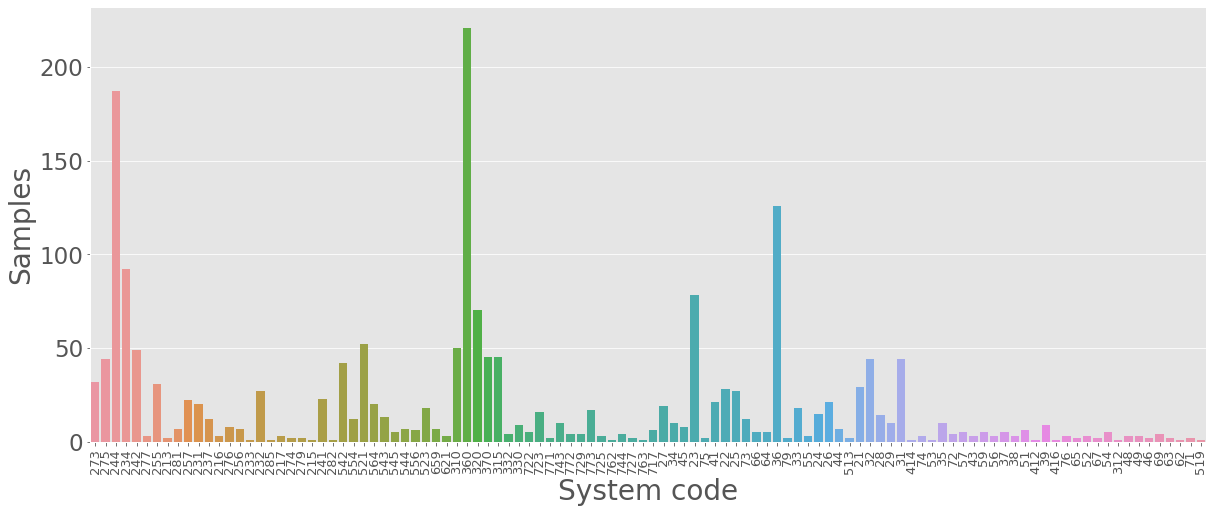

In [15]:
# creating dataframe form to draw a bar that shows "system code" vs "number of pdf samples"
fig, ax = plt.subplots(1, 1, figsize=(20, 8))
#plt.figure(figsize=(20,8))
sns.countplot(all_original_labeled['system'])
plt.xlabel("System code", fontsize=28)
plt.ylabel("Samples", fontsize=28)
plt.setp(ax.get_xticklabels(), fontsize=13, rotation=90)
plt.setp(ax.get_yticklabels(), fontsize=23)
plt.xticks(rotation=90)
#plt.savefig("./images/sample_vs_systemCode_Norwegian_And_English.pdf", bbox_inches="tight")
plt.show()

### Number of samples checker - (included in the word augmetation function)

In [16]:
# number of samples with regard to their system code

system_codes_number_samples = list(all_original_labeled["system"].value_counts()) # the number of samples from max to min
system_codes = list(all_original_labeled["system"].value_counts().keys()) # system code that belong to the samples
for n_samples, sys_cod in zip(system_codes_number_samples, system_codes):
    if n_samples > 100:
        print(sys_cod," === has === ", n_samples, " samples.")
        

360  === has ===  221  samples.
244  === has ===  187  samples.
36  === has ===  126  samples.


#### Bar chart of the modified data sets

5873
1928


/Users/tt/opt/anaconda3/envs/autility/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


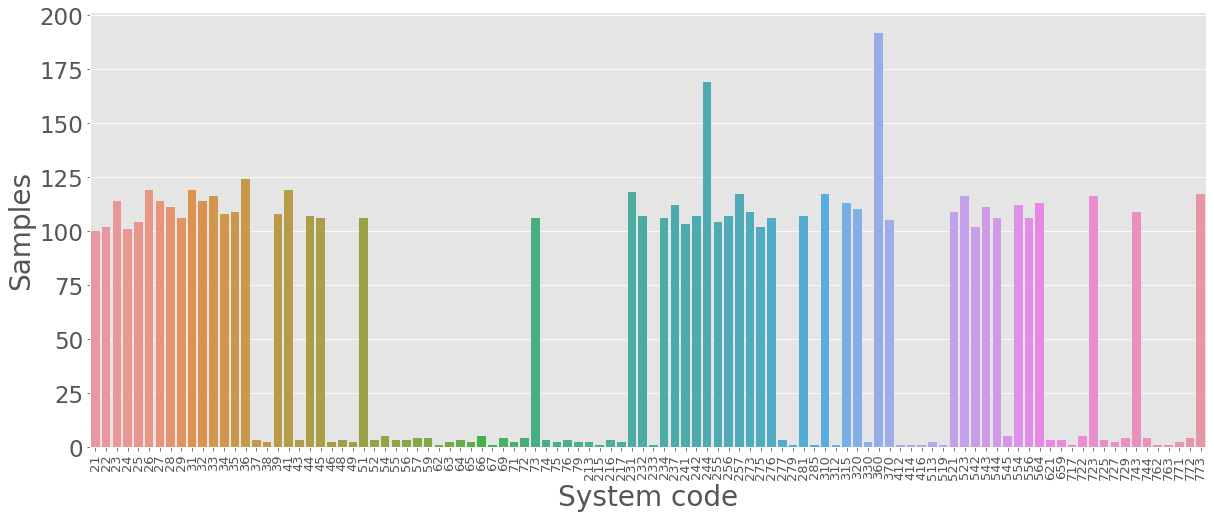

In [17]:
new_df = pd.read_csv("new_df_temporary.csv")
new_df = new_df[["text", "system", "language"]]

print(len(new_df))
print(len(all_original_labeled))

# creating dataframe form to draw a bar that shows "system code" vs "number of pdf samples"
fig, ax = plt.subplots(1, 1, figsize=(20, 8))
#plt.figure(figsize=(20,8))
sns.countplot(new_df['system'])
plt.xlabel("System code", fontsize=28)
plt.ylabel("Samples", fontsize=28)
plt.setp(ax.get_xticklabels(), fontsize=13, rotation=90)
plt.setp(ax.get_yticklabels(), fontsize=23)
plt.xticks(rotation=90)
#plt.savefig("./images/sample_vs_systemCode_Norwegian_And_English_agumented.pdf", bbox_inches="tight")
plt.show()



#### Bar chart of the modified + original data sets with samples greater than 100, that will be aslo used to train the algorithms

Numeber of samples greater than 99:  51
[360, 244, 36, 41, 26, 31, 231, 257, 310, 773, 33, 723, 523, 27, 23, 32, 315, 564, 237, 554, 543, 28, 320, 743, 521, 35, 273, 34, 39, 281, 44, 242, 232, 256, 234, 45, 276, 556, 544, 29, 51, 73, 370, 255, 25, 241, 22, 542, 275, 24, 21]


/Users/tt/opt/anaconda3/envs/autility/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


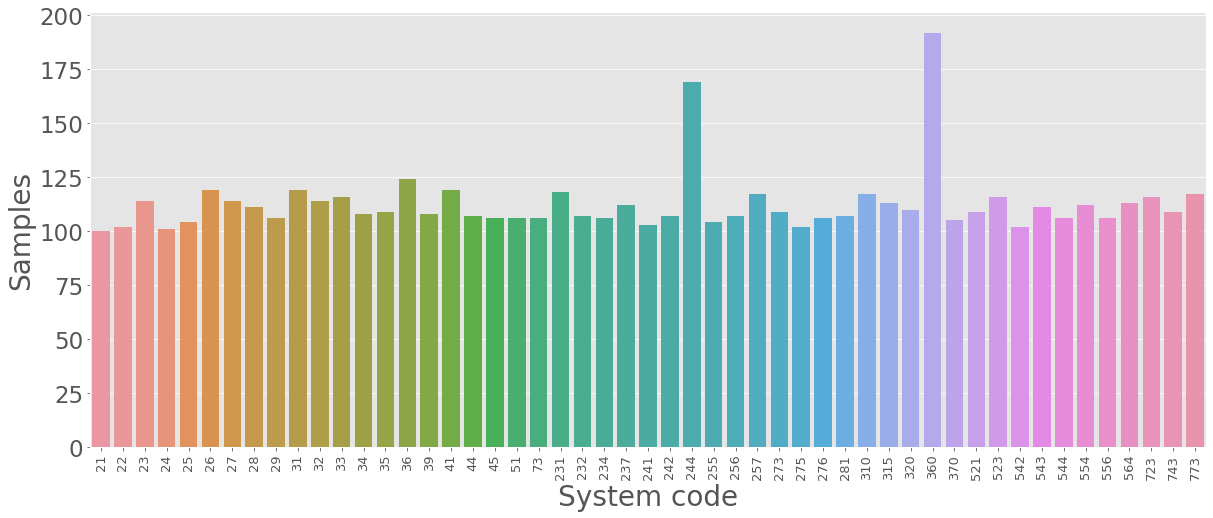

In [18]:
new_df_copy = new_df.copy(deep = True)
new_df_copy = shuffle(new_df_copy)
new_df_copy = properIndex(new_df_copy)
new_df_copy.head()

# numbers for samples greater than 99
N = 0
system_codes_number_samples = list(new_df_copy["system"].value_counts()) # the number of samples from max to min
system_codes = list(new_df_copy["system"].value_counts().keys()) # system code that belong to the samples
for n_samples, sys_cod in zip(system_codes_number_samples, system_codes):
    if n_samples > 99:
        N += 1
print("Numeber of samples greater than 99: ", N)

# unique values
sysCode = list(new_df_copy["system"].value_counts().keys())
# Top n most common system code or label:
n = N
if len(sysCode) > n:
    top_cats = sysCode[:n]
    new_df_copy = new_df_copy[new_df_copy["system"].isin(top_cats)]
    sysCode = list(new_df_copy["system"].value_counts().keys())
    print(sysCode)
    
# Print percentage of samples corresponding to each label
label_counts = new_df_copy["system"].value_counts()

for label, count in zip(label_counts.index, label_counts.values):
    percent = 100*count/len(new_df_copy)
    #if percent < 1:
    #    break
    # system code and their percentage
    #print('{}: {:.2f} %'.format(label, percent))

# the system codes that I'm going to work with
# For all system codes with samples greater than 100 samples
fig, ax = plt.subplots(1, 1, figsize=(20, 8))
#plt.figure(figsize=(20,8))
sns.countplot(new_df_copy['system'])
plt.xlabel("System code", fontsize=28)
plt.ylabel("Samples", fontsize=28)
plt.setp(ax.get_xticklabels(), fontsize=13, rotation=90)
plt.setp(ax.get_yticklabels(), fontsize=23)
plt.xticks(rotation=90)
#plt.savefig("./images/sample_vs_systemCode_Norwegian_And_English_agumented.pdf", bbox_inches="tight")
plt.show()


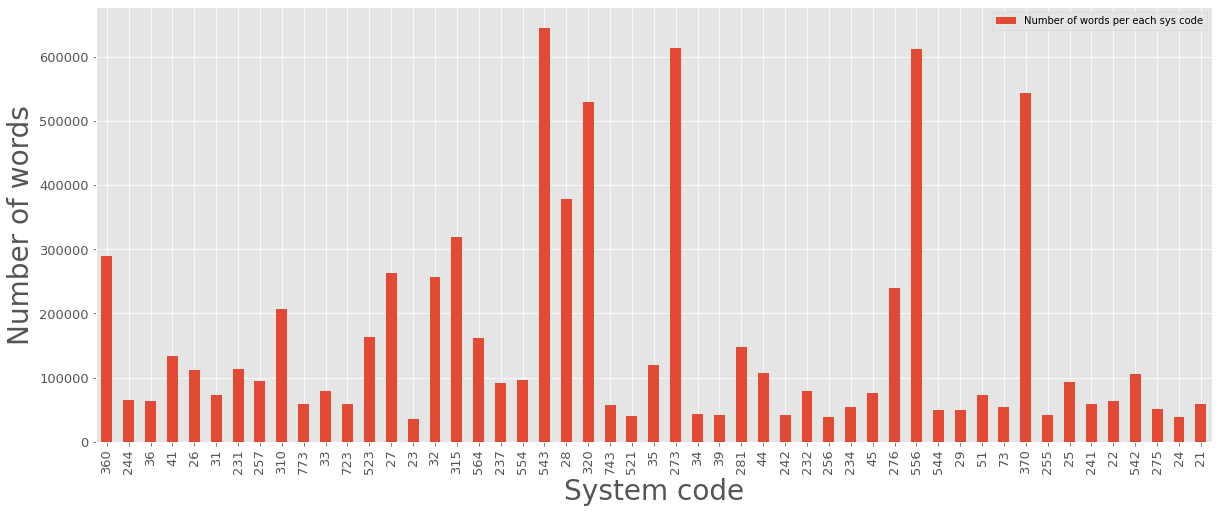

In [19]:
#all_original_labeled = cleaning_dataframeColumns(new_df_copy, "text")

df_cop = new_df_copy.copy(deep=True)
x_ = []
y_ = []

for x, y in df_cop.system.value_counts().items():
    #print(x, y)
    x_.append(x)
    y_.append(y)

    # creating dataframe form to draw a bar that shows "system code" vs "number of pdf samples"
#fig, ax = plt.subplots(1, 1, figsize=(20, 8))

word_length = [0]*len(x_)
#print(word_length)

for i, text in enumerate(zip(df_cop.system, df_cop.text)):
    sys = list(text)[0]
    text = list(text)[1].lower().split()
    
    if sys in x_:
        indx = x_.index(sys)
        #print(sys)
        #print(len(text))
        word_length[indx] += len(text)

# sum of words for the texts that belong to each system code

# Creating a pandas dataframe
df = pd.DataFrame({'system': x_, 'Number of words per each sys code': word_length})

# creates a bar graph of size 15 inches wide and 10 inches high
df.plot.bar(x='system', y='Number of words per each sys code', rot=0, figsize=(20, 8), fontsize=13)
plt.ylabel("Number of words", fontsize=28)
plt.xlabel("System code", fontsize=28)
plt.setp(ax.get_xticklabels(), fontsize=13, rotation=90)
plt.setp(ax.get_yticklabels(), fontsize=23)
plt.xticks(rotation=90)
#plt.savefig("./images/droped_word_range.pdf", bbox_inches="tight")
plt.show()

# Working with Supervised-part

In [20]:
# making sure that we've cleaned data
#new_df_copy = cleaning_dataframeColumns(new_df_copy, "text")
new_df_copy = cleaner_two(new_df_copy)
#new_df_copy['text']= new_df_copy['text'].apply(lambda x: punctuationsRemoval_two(x))

In [21]:
new_df_copy = stopWordsFor_MultiLang(new_df_copy)

/Users/tt/opt/anaconda3/envs/autility/lib/python3.7/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [22]:
# divide language of english and norwegian
counter_nor = 0
counter_en = 0
for i in range(len(new_df_copy)):
    if new_df_copy["language"].iloc[i]  == "English":
        counter_en += 1
    elif new_df_copy["language"].iloc[i] == "Norwegian":
        counter_nor += 1
        
print("Norwegian: ", counter_nor)
print("English: ", counter_en)

Norwegian:  4899
English:  842


#### As one can see the number of files with norwegian language is much higher. Thus focus with norwegian

In [23]:
new_df_copy = properIndex(new_df_copy)
new_df_copy = language_excluder_english(new_df_copy)
new_df_copy = properIndex(new_df_copy)
for i in range(len(new_df_copy)):
    new_df_copy["text"].iloc[i] = new_df_copy["text"].iloc[i].lower()

In [24]:
labels = new_df_copy['system'].value_counts()
labels

360    183
244    161
33     116
523    116
27     114
554    112
310    111
36     110
35     109
743    109
273    108
256    107
773    107
281    107
257    107
543    106
51     106
29     106
45     106
44     106
73     106
723    105
25     104
275    102
542    102
22     102
232    102
231    101
242    101
24     101
21     100
23      99
26      98
237     97
521     95
255     94
31      90
241     88
41      87
315     81
370     80
28      79
234     78
320     76
39      75
34      74
32      59
564     54
556     38
544     19
276      5
Name: system, dtype: int64

In [25]:
# Top n most common system code or label: Or system code with at least 100 samples
df_cop = new_df_copy.copy()
sysCode = list(df_cop["system"].value_counts().keys())
#sysCode = sys.copy()

n = 50
# don't need takes all 
if len(sysCode) > n:
    top_cats = sysCode[:n]
    #top_cats = sys[:n]
    df_cop = df_cop[df_cop["system"].isin(top_cats)]
    sysCode = list(df_cop["system"].value_counts().keys())
    print(len(sysCode))
    print(sysCode)

50
[360, 244, 33, 523, 27, 554, 310, 36, 35, 743, 273, 256, 773, 281, 257, 543, 51, 29, 45, 44, 73, 723, 25, 275, 542, 22, 232, 231, 242, 24, 21, 23, 26, 237, 521, 255, 31, 241, 41, 315, 370, 28, 234, 320, 39, 34, 32, 564, 556, 544]


In [26]:
for sample, sys_cod in zip(system_codes_number_samples, system_codes):
    if sample > 90 and sys_cod == "244":
        print("yes")
    

Numeber of samples greater than 101:  27
[360, 244, 33, 523, 27, 554, 310, 36, 35, 743, 273, 256, 773, 281, 257, 543, 51, 29, 45, 44, 73, 723, 25, 275, 542, 22, 232, 231, 242, 24, 21, 23, 26, 237, 521, 255, 31, 241, 41, 315, 370, 28, 234, 320, 39, 34, 32, 564, 556, 544]


/Users/tt/opt/anaconda3/envs/autility/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


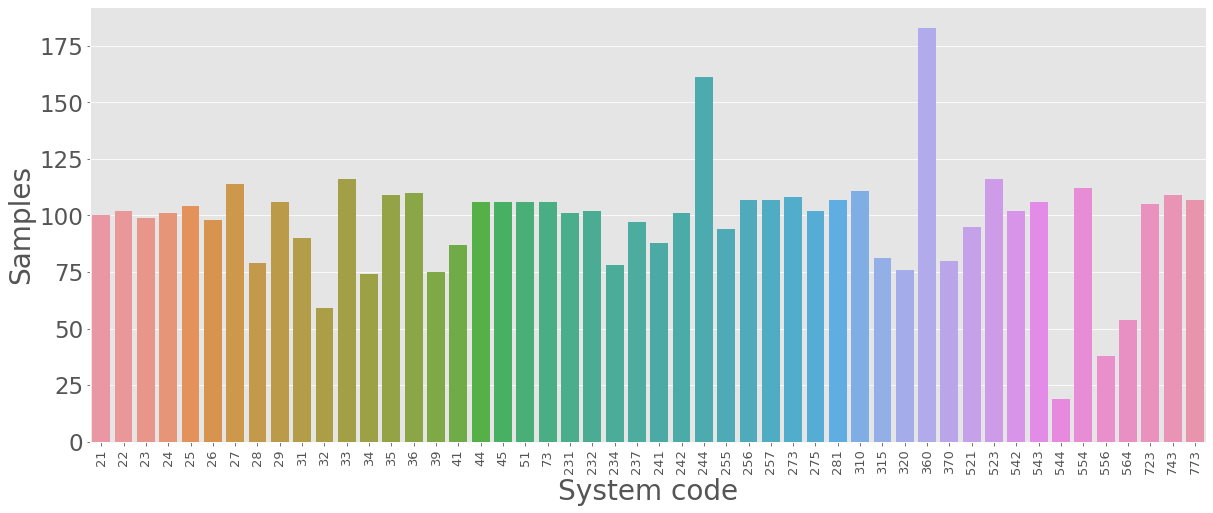

In [27]:

# numbers for samples greater than 101
N = 0
system_codes_number_samples = list(df_cop["system"].value_counts()) # the number of samples from max to min
system_codes = list(df_cop["system"].value_counts().keys()) # system code that belong to the samples
for n_samples, sys_cod in zip(system_codes_number_samples, system_codes):
    if n_samples > 101:
        N += 1
print("Numeber of samples greater than 101: ", N)

# unique values
sysCode = list(df_cop["system"].value_counts().keys())
# Top n most common system code or label:
n = N
if len(sysCode) > n:
    top_cats = sysCode[:n]
    df_copy = df_cop[df_cop["system"].isin(top_cats)]
    sysCode = list(df_cop["system"].value_counts().keys())
    print(sysCode)
    
# Print percentage of samples corresponding to each label
label_counts = df_cop["system"].value_counts()

for label, count in zip(label_counts.index, label_counts.values):
    percent = 100*count/len(df_cop)
    #if percent < 1:
    #    break
    # system code and their percentage
    #print('{}: {:.2f} %'.format(label, percent))

# the system codes that I'm going to work with
# For all system codes with samples greater than 100 samples
fig, ax = plt.subplots(1, 1, figsize=(20, 8))
#plt.figure(figsize=(20,8))
sns.countplot(df_cop['system'])
plt.xlabel("System code", fontsize=28)
plt.ylabel("Samples", fontsize=28)
plt.setp(ax.get_xticklabels(), fontsize=13, rotation=90)
plt.setp(ax.get_yticklabels(), fontsize=23)
plt.xticks(rotation=90)
#plt.savefig("images/syscode_and_sample_top30_for_supervised.pdf", bbox_inches="tight")
plt.show()


In [28]:
labels = df_cop['system'].value_counts()
labels

360    183
244    161
33     116
523    116
27     114
554    112
310    111
36     110
35     109
743    109
273    108
256    107
773    107
281    107
257    107
543    106
51     106
29     106
45     106
44     106
73     106
723    105
25     104
275    102
542    102
22     102
232    102
231    101
242    101
24     101
21     100
23      99
26      98
237     97
521     95
255     94
31      90
241     88
41      87
315     81
370     80
28      79
234     78
320     76
39      75
34      74
32      59
564     54
556     38
544     19
Name: system, dtype: int64

In [29]:
df_cop["class"] = df_cop["system"]
df_cop

,text,system,language,class
0,kro produksjon as tlf wwwkroproduksjonno vedli...,360,Norwegian,360
1,cowerica appdatalocaltemprevitpdf bb kompanjon...,33,Norwegian,33
2,boen sportsgulv slitesterk kontrolloverflaten ...,45,Norwegian,45
3,norsk prosjekteringsmal n m lestokkrevisjon nr...,22,Norwegian,22
4,environs sertifiseringer innholdsfortegnelse i...,275,Norwegian,275
...,...,...,...,...
4894,effektuering udsfagsuaske henrettelse un utsla...,24,Norwegian,24
4895,deprimert nyg rd veggie nittedal r pleieavtale...,26,Norwegian,26
4896,brannspjeld fkrseu brannspjeld fkrseu bruker m...,360,Norwegian,360
4897,nittedal ungdomskole topografisk anatomi vestf...,523,Norwegian,523


In [30]:
print(sorted(df_cop["system"].unique()))

[21, 22, 23, 24, 25, 26, 27, 28, 29, 31, 32, 33, 34, 35, 36, 39, 41, 44, 45, 51, 73, 231, 232, 234, 237, 241, 242, 244, 255, 256, 257, 273, 275, 281, 310, 315, 320, 360, 370, 521, 523, 542, 543, 544, 554, 556, 564, 723, 743, 773]


In [31]:
for i in range(len(sorted(df_cop["system"].unique()))):
    all_unique_system = sorted(df_cop["system"].unique())
    df_cop["class"] = df_cop["class"].replace([all_unique_system[i]], i)
    
classes = df_cop['class'].value_counts()
classes

37    183
27    161
11    116
40    116
6     114
44    112
34    111
14    110
13    109
48    109
31    108
29    107
49    107
33    107
30    107
42    106
19    106
8     106
18    106
17    106
20    106
47    105
4     104
32    102
41    102
1     102
22    102
21    101
26    101
3     101
0     100
2      99
5      98
24     97
39     95
28     94
9      90
25     88
16     87
35     81
38     80
7      79
23     78
36     76
15     75
12     74
10     59
46     54
45     38
43     19
Name: class, dtype: int64

In [32]:
print(all_unique_system)
print(len(all_unique_system))

[21, 22, 23, 24, 25, 26, 27, 28, 29, 31, 32, 33, 34, 35, 36, 39, 41, 44, 45, 51, 73, 231, 232, 234, 237, 241, 242, 244, 255, 256, 257, 273, 275, 281, 310, 315, 320, 360, 370, 521, 523, 542, 543, 544, 554, 556, 564, 723, 743, 773]
50


/Users/tt/opt/anaconda3/envs/autility/lib/python3.7/site-packages/ipykernel_launcher.py:20: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.


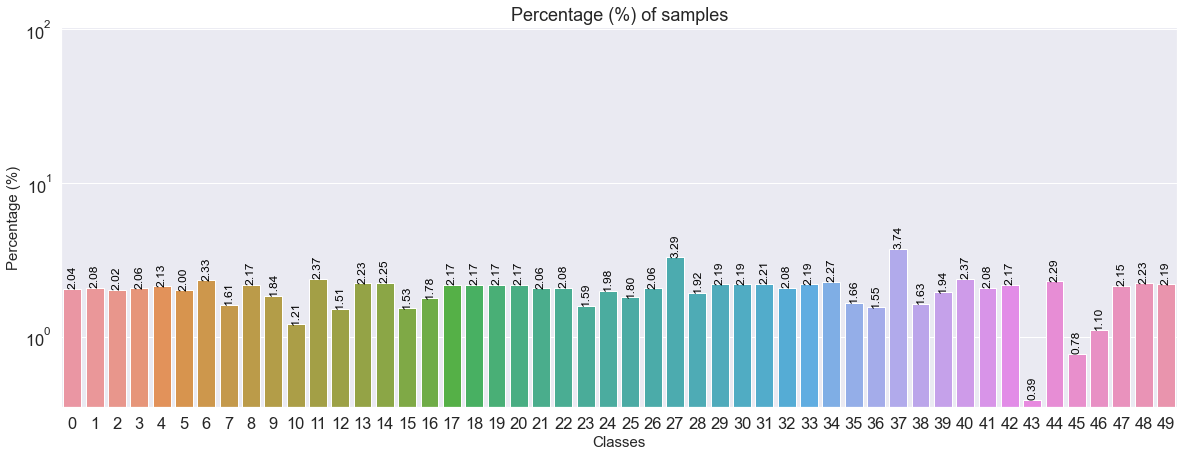

In [33]:
import math
#setting sns style
sns.set(font_scale = 1.5)

#Creating 2 axes
f,ax = plt.subplots(1,figsize=(20,7))

#Creating barplot showing the percentage 
plot_master=pd.DataFrame(classes)
plot_master.reset_index(inplace=True)
plot_master.columns = ['Class', 'Counts']
sns.barplot(x='Class',y=plot_master['Counts']/plot_master.Counts.sum()*100,data=plot_master,ax=ax)
ax.set_ylabel('Percentage (%)',fontsize=15)
ax.set_yscale('log')
ax.set_xlabel('Classes',fontsize=15)
ax.set_title('Percentage (%) of samples',fontsize=18)

# ylim max value to be set
y_max = (plot_master['Counts']/plot_master.Counts.sum()*100).max() 
ax.set_ylim([0, math.ceil(y_max)+100])
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%.2f' % float(p.get_height()), fontsize=12, color='black', ha='center', va='bottom', rotation=90)
    
plt.savefig("images/chosen_system_code_classes_with_percentage_.pdf", bbox_inches="tight")
plt.show()

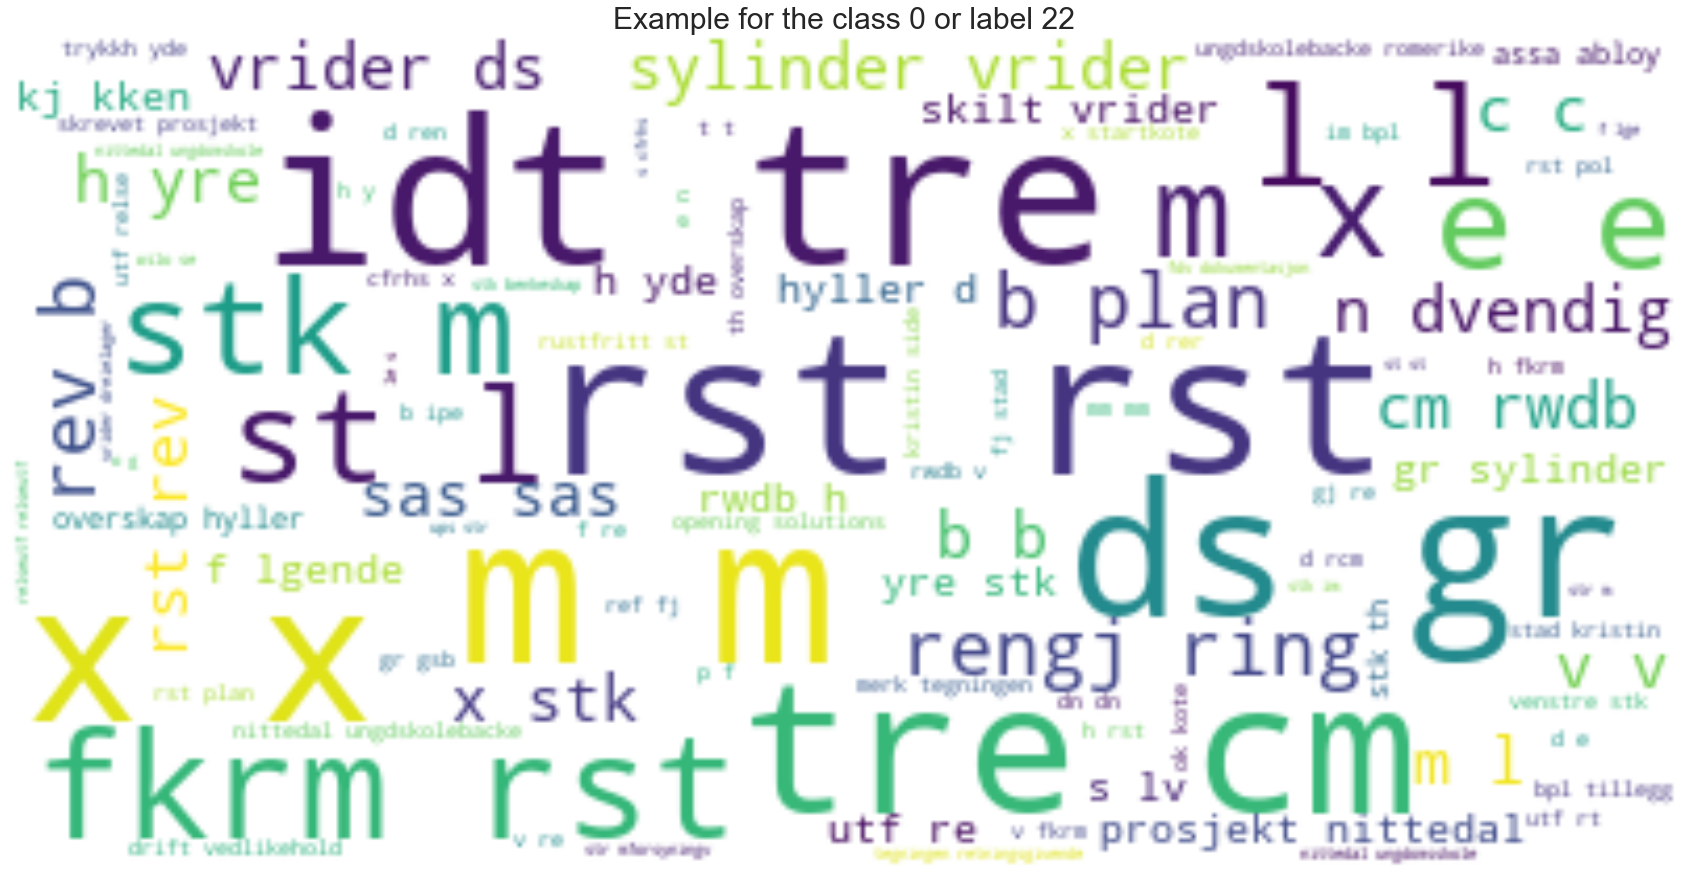

In [34]:
# Just to check to one of them, this could be done in the begning of the project

import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS , ImageColorGenerator

# for text:
df_ADR = df_cop[df_cop['class']==0]
t_All = " ".join(t for t in df_cop.text)
t_ADR = " ".join(t for t in df_ADR.text)

fig, ax = plt.subplots(1, 1, figsize  = (30,30))
# Create and generate a word cloud image:
wordcloud_ALL = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(t_All)
wordcloud_ADR = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(t_ADR)

# Display the generated image:
ax.imshow(wordcloud_ALL, interpolation='bilinear')
ax.set_title('Example for the class 0 or label 21', fontsize=30)
ax.axis('off')
plt.savefig("images/word_cloud_of_single_system_code.pdf", bbox_inches="tight")
plt.show()


#### Preforming tokenization + lemmetazation

In [35]:
# tokenization of claim column
# from nltk
def tokenization(text):
    text = re.split('\W+', text)
    return text
df_cop["clean_text"] = df_cop['text'].apply(lambda x: tokenization(x.lower()))

# removing stop words, double-check
def remove_stopwords(text):
    text = [word for word in text if word not in stop_words_no]
    return text
df_cop.clean_text = df_cop['clean_text'].apply(lambda x: remove_stopwords(x))

#Stemming 
ps = nltk.PorterStemmer()
def stemming(text):
    text = [ps.stem(word) for word in text]
    return text
df_cop.clean_text = df_cop['clean_text'].apply(lambda x: stemming(x))


#Lammitization
def wordLemmatizer(text):
    text = [word_net.lemmatize(word) for word in text]
    return text

df_cop.clean_text = df_cop['clean_text'].apply(lambda x: wordLemmatizer(x))
# df.clean_doc= df['clean_doc'].apply(lambda x: lemmatizer(x))
df_cop.head()

,text,system,language,class,clean_text
0,kro produksjon as tlf wwwkroproduksjonno vedli...,360,Norwegian,37,"[kro, produksjon, a, tlf, wwwkroproduksjonno, ..."
1,cowerica appdatalocaltemprevitpdf bb kompanjon...,33,Norwegian,11,"[cowerica, appdatalocaltemprevitpdf, bb, kompa..."
2,boen sportsgulv slitesterk kontrolloverflaten ...,45,Norwegian,18,"[boen, sportsgulv, slitesterk, kontrolloverfla..."
3,norsk prosjekteringsmal n m lestokkrevisjon nr...,22,Norwegian,1,"[norsk, prosjekteringsm, n, m, lestokkrevisjon..."
4,environs sertifiseringer innholdsfortegnelse i...,275,Norwegian,32,"[environ, sertifisering, innholdsfortegnels, i..."


In [36]:
# To avoid running all again
df_cop_2 = df_cop.copy()

In [37]:
df_cop = properIndex(df_cop)

In [38]:
for i in range(len(df_cop)):
    df_cop["clean_text"].iloc[i] = " ".join(df_cop["clean_text"].iloc[i]) 

/Users/tt/opt/anaconda3/envs/autility/lib/python3.7/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [39]:
df_cop.columns

Index(['text', 'system', 'language', 'class', 'clean_text'], dtype='object')

In [181]:
X = df_cop["clean_text"]
y = df_cop['class'].astype(int)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape,X_test.shape

((3915,), (979,))

In [182]:
y_train.shape, y_test.shape

((3915,), (979,))

In [183]:
vectorizer = TfidfVectorizer()
vectorizer.fit(X_train)


TfidfVectorizer()

In [184]:
X_train = vectorizer.transform(X_train)
X_test = vectorizer.transform(X_test)

In [185]:
#print(X_train)
#print(X_test)

#### Classifiers

In [186]:
# Decision tree
from sklearn.metrics import accuracy_score
clf = tree.DecisionTreeClassifier()
clf.fit(X_train, y_train)
score = clf.score(X_test, y_test)
#preds = clf.predict_proba(X_test)
#print('Accuracy: {:.5f}'.format(accuracy_score(y_test,preds.argmax(axis=1))))
print('Model accuracy score with default hyperparameters: {0:0.4f}'. format(score))

Model accuracy score with default hyperparameters: 0.8611


In [187]:
# RandomForest
from sklearn.metrics import accuracy_score
clf_rf = RandomForestClassifier()
clf_rf.fit(X_train, y_train)
score = clf_rf.score(X_test, y_test)
#preds = clf.predict_proba(X_test)
#print('Accuracy: {:.5f}'.format(accuracy_score(y_test,preds.argmax(axis=1))))
print('Model accuracy score with default hyperparameters: {0:0.4f}'. format(score))

Model accuracy score with default hyperparameters: 0.9111


In [188]:
print(clf_rf.predict(X_test[0])[0])

39


In [214]:
# Naive Bayes Classifier
clf_NB = MultinomialNB()
clf_NB.fit(X_train, y_train)
#score = clf_NB.score(X_test, y_test)
y_pred = clf_NB.predict(X_test)
print('Model accuracy score with default hyperparameters: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with default hyperparameters: 0.8570


In [49]:
# Support Vector Machine
svc = SVC() 
# fit classifier to training set
svc.fit(X_train,y_train)
# make predictions on test set
y_pred = svc.predict(X_test)
print('Model accuracy score with default hyperparameters: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with default hyperparameters: 0.9030


In [50]:
print(sorted(df_cop["class"].unique()))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]


In [51]:
#  KNeighborsClassifier
classifier = KNeighborsClassifier()
classifier.fit(X_train, y_train)
score = classifier.score(X_test, y_test)
print('Model accuracy score with default hyperparameters: {0:0.4f}'. format(score))

Model accuracy score with default hyperparameters: 0.8927


In [52]:
df_cop.columns

Index(['text', 'system', 'language', 'class', 'clean_text'], dtype='object')

In [53]:
import logging
import numpy as np
from optparse import OptionParser
import sys
from time import time
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import HashingVectorizer
from sklearn.feature_selection import SelectFromModel
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.linear_model import RidgeClassifier
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.naive_bayes import BernoulliNB, ComplementNB, MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import NearestCentroid
from sklearn.ensemble import RandomForestClassifier
from sklearn.utils.extmath import density
from sklearn import metrics

In [54]:
# Display progress logs on stdout
logging.basicConfig(level=logging.INFO, format="%(asctime)s %(levelname)s %(message)s")

op = OptionParser()
op.add_option(
    "--report",
    action="store_true",
    dest="print_report",
    help="Print a detailed classification report.",
)
op.add_option(
    "--chi2_select",
    action="store",
    type="int",
    dest="select_chi2",
    help="Select some number of features using a chi-squared test",
)
op.add_option(
    "--confusion_matrix",
    action="store_true",
    dest="print_cm",
    help="Print the confusion matrix.",
)
op.add_option(
    "--top10",
    action="store_true",
    dest="print_top10",
    help="Print ten most discriminative terms per class for every classifier.",
)
op.add_option(
    "--all_categories",
    action="store_true",
    dest="all_categories",
    help="Whether to use all categories or not.",
)
op.add_option("--use_hashing", action="store_true", help="Use a hashing vectorizer.")
op.add_option(
    "--n_features",
    action="store",
    type=int,
    default=2 ** 16,
    help="n_features when using the hashing vectorizer.",
)
op.add_option(
    "--filtered",
    action="store_true",
    help=(
        "Remove newsgroup information that is easily overfit: "
        "headers, signatures, and quoting."
    ),
)


def is_interactive():
    return not hasattr(sys.modules["__main__"], "__file__")


# work-around for Jupyter notebook and IPython console
argv = [] if is_interactive() else sys.argv[1:]
(opts, args) = op.parse_args(argv)
if len(args) > 0:
    op.error("this script takes no arguments.")
    sys.exit(1)

print(__doc__)
op.print_help()
print()

Automatically created module for IPython interactive environment
Usage: ipykernel_launcher.py [options]

Options:
  -h, --help            show this help message and exit
  --report              Print a detailed classification report.
  --chi2_select=SELECT_CHI2
                        Select some number of features using a chi-squared
                        test
  --confusion_matrix    Print the confusion matrix.
  --top10               Print ten most discriminative terms per class for
                        every classifier.
  --all_categories      Whether to use all categories or not.
  --use_hashing         Use a hashing vectorizer.
  --n_features=N_FEATURES
                        n_features when using the hashing vectorizer.
  --filtered            Remove newsgroup information that is easily overfit:
                        headers, signatures, and quoting.



In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2,stratify=y)

def size_mb(docs):
    return sum(len(repr(s).encode('utf-8')) for s in docs) / 1e6

data_train_size_mb = size_mb(X_train)
data_test_size_mb = size_mb(X_test)


print("Extracting features from the training data using a sparse vectorizer")
t0 = time()
if opts.use_hashing:
    vectorizer = HashingVectorizer(alternate_sign=False, n_features=opts.n_features
    )
    X_train = vectorizer.transform(X_train)
else:
    vectorizer = TfidfVectorizer(sublinear_tf=True, max_df=0.5)
    X_train = vectorizer.fit_transform(X_train)
duration = time() - t0
print("done in %fs at %0.3fMB/s" % (duration, data_train_size_mb / duration))
print("n_samples: %d, n_features: %d" % X_train.shape)
print()

print("Extracting features from the test data using the same vectorizer")
t0 = time()
X_test = vectorizer.transform(X_test)
duration = time() - t0
print("done in %fs at %0.3fMB/s" % (duration, data_test_size_mb / duration))
print("n_samples: %d, n_features: %d" % X_test.shape)
print()

# mapping from integer feature name to original token string
if opts.use_hashing:
    feature_names = None
else:
    feature_names = vectorizer.get_feature_names_out()

if opts.select_chi2:
    print("Extracting %d best features by a chi-squared test" % opts.select_chi2)
    t0 = time()
    ch2 = SelectKBest(chi2, k=opts.select_chi2)
    X_train = ch2.fit_transform(X_train, y_train)
    X_test = ch2.transform(X_test)
    if feature_names is not None:
        # keep selected feature names
        feature_names = feature_names[ch2.get_support()]
    print("done in %fs" % (time() - t0))
    print()


def trim(s):
    """Trim string to fit on terminal (assuming 80-column display)"""
    return s if len(s) <= 80 else s[:77] + "..."

Extracting features from the training data using a sparse vectorizer
done in 1.937808s at 15.740MB/s
n_samples: 3915, n_features: 58521

Extracting features from the test data using the same vectorizer
done in 0.497024s at 16.686MB/s
n_samples: 979, n_features: 58521



In [56]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


def benchmark(clf):
    print("_" * 80)
    print("Training: ")
    print(clf)
    t0 = time()
    clf.fit(X_train, y_train)
    train_time = time() - t0
    print("train time: %0.3fs" % train_time)
 
    t0 = time()
    pred = clf.predict(X_test)
    test_time = time() - t0
    print("test time:  %0.3fs" % test_time)

    score = metrics.accuracy_score(y_test, pred)
    print("accuracy:   %0.3f" % score)
    
    precision_score = metrics.precision_score(y_test, pred, average="micro")
    print("precision score:   %0.3f" % precision_score)
    
    mse = metrics.mean_squared_error(y_test, pred)
    print("mean squared error:   %0.3f" % mse)
    
    r2_score=metrics.r2_score(y_test, pred)
    print("r2_score:   %0.3f" % r2_score)
    
    f1_score=metrics.f1_score(y_test, pred, average="micro")
    print("f1_score:   %0.3f" % f1_score)
    
    recall = metrics.recall_score(y_test, pred, average = "micro")
    print("recall:   %0.3f" % recall)


    
    if hasattr(clf, "coef_"):
        print("dimensionality: %d" % clf.coef_.shape[1])
        print("density: %f" % density(clf.coef_))

        if opts.print_top10 and feature_names is not None:
            print("top 10 keywords per class:")
            for i, label in enumerate(target_names):
                top10 = np.argsort(clf.coef_[i])[-10:]
                print(trim("%s: %s" % (label, " ".join(feature_names[top10]))))
        print()

    if opts.print_report:
        print("classification report:")
        print(metrics.classification_report(y_test, pred, target_names=target_names))

    if opts.print_cm:
        print("confusion matrix:")
        print(metrics.confusion_matrix(y_test, pred))

    print()
    clf_descr = str(clf).split("(")[0]
    
    return clf_descr, score,  precision_score, mse, r2_score, f1_score, recall,   train_time, test_time


results = []
for clf, name in (
    (SVC(), "Support Vector Machine"),
    (tree.DecisionTreeClassifier(), "Decision Tree"),
    (RidgeClassifier(tol=1e-2, solver="sag"), "Ridge Classifier"),
    (Perceptron(max_iter=50), "Perceptron"),
    (PassiveAggressiveClassifier(max_iter=50), "Passive-Aggressive"),
    (KNeighborsClassifier(n_neighbors=10), "kNN"),
    (RandomForestClassifier(), "Random forest"),
):
    print("=" * 80)
    print(name)
    results.append(benchmark(clf))

for penalty in ["l2", "l1"]:
    print("=" * 80)
    print("%s penalty" % penalty.upper())
    # Train Liblinear model
    results.append(benchmark(LinearSVC(penalty=penalty, dual=False, tol=1e-3)))

    # Train SGD model
    results.append(benchmark(SGDClassifier(alpha=0.0001, max_iter=50, penalty=penalty)))

# Train SGD with Elastic Net penalty
print("=" * 80)
print("Elastic-Net penalty")
results.append(
    benchmark(SGDClassifier(alpha=0.0001, max_iter=50, penalty="elasticnet"))
)

# Train NearestCentroid without threshold
print("=" * 80)
print("NearestCentroid (aka Rocchio classifier)")
results.append(benchmark(NearestCentroid()))

# Train sparse Naive Bayes classifiers
print("=" * 80)
print("Naive Bayes")
results.append(benchmark(MultinomialNB(alpha=0.01)))
results.append(benchmark(BernoulliNB(alpha=0.01)))
results.append(benchmark(ComplementNB(alpha=0.1)))

print("=" * 80)
print("LinearSVC with L1-based feature selection")
# The smaller C, the stronger the regularization.
# The more regularization, the more sparsity.
results.append(
    benchmark(
        Pipeline(
            [
                (
                    "feature_selection",
                    SelectFromModel(LinearSVC(penalty="l1", dual=False, tol=1e-3)),
                ),
                ("classification", LinearSVC(penalty="l2")),
            ]
        )
    )
)

Support Vector Machine
________________________________________________________________________________
Training: 
SVC()
train time: 25.823s
test time:  3.679s
accuracy:   0.910
precision score:   0.910
mean squared error:   11.143
r2_score:   0.945
f1_score:   0.910
recall:   0.910

Decision Tree
________________________________________________________________________________
Training: 
DecisionTreeClassifier()
train time: 5.631s
test time:  0.002s
accuracy:   0.863
precision score:   0.863
mean squared error:   21.488
r2_score:   0.894
f1_score:   0.863
recall:   0.863

Ridge Classifier
________________________________________________________________________________
Training: 
RidgeClassifier(solver='sag', tol=0.01)


/Users/tt/opt/anaconda3/envs/autility/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:730: UserWarning: "sag" solver requires many iterations to fit an intercept with sparse inputs. Either set the solver to "auto" or "sparse_cg", or set a low "tol" and a high "max_iter" (especially if inputs are not standardized).
  '"sag" solver requires many iterations to fit '


train time: 8.081s
test time:  0.017s
accuracy:   0.926
precision score:   0.926
mean squared error:   6.703
r2_score:   0.967
f1_score:   0.926
recall:   0.926
dimensionality: 58521
density: 1.000000


Perceptron
________________________________________________________________________________
Training: 
Perceptron(max_iter=50)
train time: 0.598s
test time:  0.013s
accuracy:   0.909
precision score:   0.909
mean squared error:   15.630
r2_score:   0.923
f1_score:   0.909
recall:   0.909
dimensionality: 58521
density: 0.081139


Passive-Aggressive
________________________________________________________________________________
Training: 
PassiveAggressiveClassifier(max_iter=50)
train time: 1.291s
test time:  0.013s
accuracy:   0.925
precision score:   0.925
mean squared error:   6.794
r2_score:   0.966
f1_score:   0.925
recall:   0.925
dimensionality: 58521
density: 0.408488


kNN
________________________________________________________________________________
Training: 
KNeighborsClass

/Users/tt/opt/anaconda3/envs/autility/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


train time: 3.584s
test time:  0.011s
accuracy:   0.896
precision score:   0.896
mean squared error:   10.330
r2_score:   0.949
f1_score:   0.896
recall:   0.896
dimensionality: 58521
density: 0.000356


________________________________________________________________________________
Training: 
SGDClassifier(max_iter=50, penalty='l1')
train time: 1.517s
test time:  0.013s
accuracy:   0.896
precision score:   0.896
mean squared error:   10.491
r2_score:   0.948
f1_score:   0.896
recall:   0.896
dimensionality: 58521
density: 0.001568


Elastic-Net penalty
________________________________________________________________________________
Training: 
SGDClassifier(max_iter=50, penalty='elasticnet')
train time: 2.326s
test time:  0.013s
accuracy:   0.916
precision score:   0.916
mean squared error:   7.584
r2_score:   0.962
f1_score:   0.916
recall:   0.916
dimensionality: 58521
density: 0.021056


NearestCentroid (aka Rocchio classifier)
______________________________________________________

/Users/tt/opt/anaconda3/envs/autility/lib/python3.7/site-packages/ipykernel_launcher.py:32: UserWarning: FixedFormatter should only be used together with FixedLocator
/Users/tt/opt/anaconda3/envs/autility/lib/python3.7/site-packages/ipykernel_launcher.py:42: UserWarning: FixedFormatter should only be used together with FixedLocator
/Users/tt/opt/anaconda3/envs/autility/lib/python3.7/site-packages/ipykernel_launcher.py:48: UserWarning: FixedFormatter should only be used together with FixedLocator


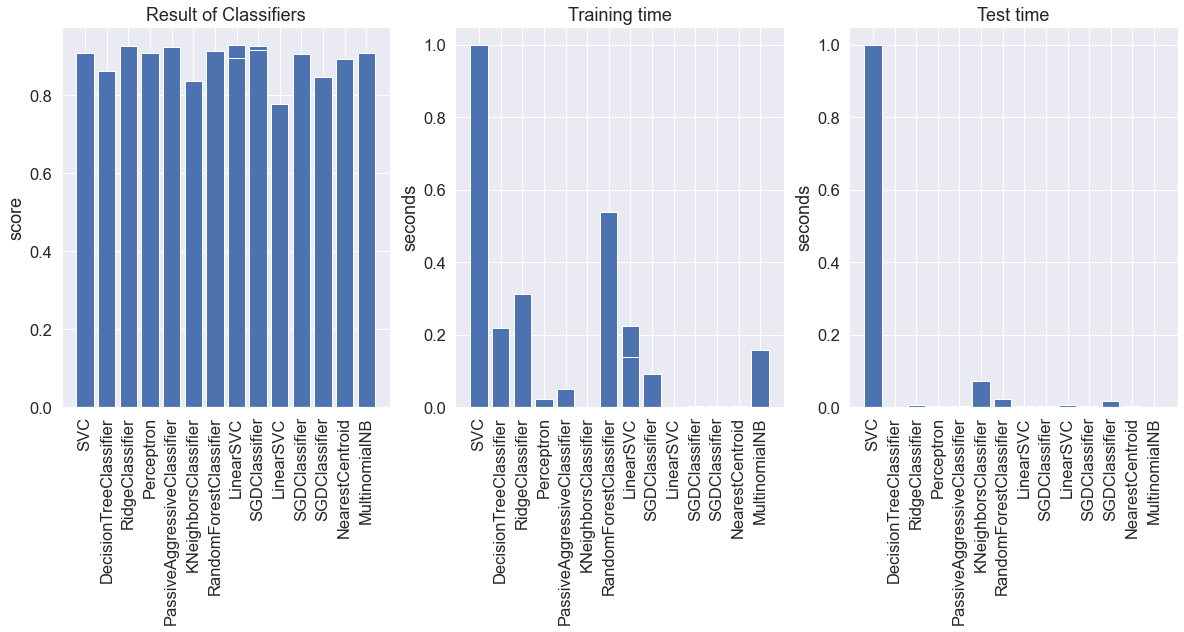

In [57]:
indices = np.arange(len(results))

clf_names = [results[i][0] for i in range(len(results))]
score = [results[i][1] for i in range(len(results))]
training_time = [results[i][-2] for i in range(len(results))]
test_time = [results[i][-1] for i in range(len(results))]

training_time = np.array(training_time) / np.max(training_time)
test_time = np.array(test_time) / np.max(test_time)

#plt.figure(figsize=(12, 8))
#plt.title("Score")
#plt.hist(indices, score, .2, label="score", color='navy')
#plt.hist(indices + .3, training_time, .2, label="training time", color='c')
#plt.hist(indices + .6, test_time, .2, label="test time", color='darkorange')
#plt.yticks(())
#plt.legend(loc='best')
#plt.subplots_adjust(left=.25)
#plt.subplots_adjust(top=.95)
#plt.subplots_adjust(bottom=.05)

#for i, c in zip(indices, clf_names):
#    plt.text(-.3, i, c)

#plt.show()

sns.set(font_scale = 1.5)
f,ax = plt.subplots(1,3,figsize=(20,7))

#Creating barplot showing the percentage 
ax[0].bar(clf_names, score)
ax[0].set_xticklabels(clf_names, rotation=90)
ax[0].set_title('Result of Classifiers',fontsize=18)
ax[0].set_ylabel("score")


# Creating barplot showing number of news


ax[1].bar(clf_names, training_time)
#ax[1].set_ylabel("accuracy",fontsize=15)
ax[1].set_xticklabels(clf_names, rotation=90)
ax[1].set_title('Training time',fontsize=18)
ax[1].set_ylabel("seconds")
#ax[1].legend(["accuracy"])

ax[2].bar(clf_names, test_time)
ax[2].set_xticklabels(clf_names, rotation=90)
ax[2].set_title('Test time',fontsize=18)
ax[2].set_ylabel("seconds")
#ax[1].legend(["accuracy"])

#plt.savefig("images/traditional_algorithms_score_train_test.pdf", bbox_inches="tight")
plt.show()

In [58]:
len(score)

17

In [59]:
average_sc = sum(score)/14

In [60]:
average_sc

1.0846344666569387

#### For ANN

In [61]:
df_cop.columns

Index(['text', 'system', 'language', 'class', 'clean_text'], dtype='object')

In [62]:
df_cop.head()

,text,system,language,class,clean_text
0,kro produksjon as tlf wwwkroproduksjonno vedli...,360,Norwegian,37,kro produksjon a tlf wwwkroproduksjonno vedlik...
1,cowerica appdatalocaltemprevitpdf bb kompanjon...,33,Norwegian,11,cowerica appdatalocaltemprevitpdf bb kompanjon...
2,boen sportsgulv slitesterk kontrolloverflaten ...,45,Norwegian,18,boen sportsgulv slitesterk kontrolloverflaten ...
3,norsk prosjekteringsmal n m lestokkrevisjon nr...,22,Norwegian,1,norsk prosjekteringsm n m lestokkrevisjon nr f...
4,environs sertifiseringer innholdsfortegnelse i...,275,Norwegian,32,environ sertifisering innholdsfortegnels innho...


In [63]:
X = df_cop["clean_text"]
y = df_cop['class'].astype(int)


In [64]:
# testing this time 30% for testing size
x_train, x_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.3,stratify=y)


In [65]:
vectorizer = TfidfVectorizer()
vectorizer.fit(x_train)

TfidfVectorizer()

In [66]:
X_train = vectorizer.transform(x_train)
X_test = vectorizer.transform(x_test)

In [67]:

XX_train = vectorizer.transform(x_train)
XX_test = vectorizer.transform(x_test)

In [68]:
print(XX_train.shape)

(3425, 56689)


In [322]:
inp_shape

(56689,)

In [69]:
inp_shape = XX_train.shape[1:]

model = models.Sequential()
model.add(Dense(64, input_shape =inp_shape , activation='relu'))
model.add(Dense(74, activation='relu'))
model.add(Dropout(0.50))
model.add(Dense(units=50, activation='softmax'))
model.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(), optimizer='adam', metrics=['accuracy'])

model.summary()
# learning_rate_reduction = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss',
#                                             patience=7,
#                                             verbose=2,
#                                             factor=0.5,
#                                             min_lr=0.000001)
# earlyStopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=20, verbose=2, mode='min')

y_train = np.asarray(y_train)
y_test = np.asarray(y_test)
history = model.fit(X_train.toarray(), 
                    y_train, 
                    epochs=10, 
                    validation_data = (X_test.toarray(),  y_test),
                    verbose = 1)

2022-06-06 13:12:45.216025: I tensorflow/core/platform/cpu_feature_guard.cc:145] This TensorFlow binary is optimized with Intel(R) MKL-DNN to use the following CPU instructions in performance critical operations:  SSE4.1 SSE4.2
To enable them in non-MKL-DNN operations, rebuild TensorFlow with the appropriate compiler flags.
2022-06-06 13:12:45.217472: I tensorflow/core/common_runtime/process_util.cc:115] Creating new thread pool with default inter op setting: 8. Tune using inter_op_parallelism_threads for best performance.


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                3628160   
_________________________________________________________________
dense_1 (Dense)              (None, 74)                4810      
_________________________________________________________________
dropout (Dropout)            (None, 74)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 50)                3750      
Total params: 3,636,720
Trainable params: 3,636,720
Non-trainable params: 0
_________________________________________________________________
Train on 3425 samples, validate on 1469 samples
Epoch 1/10
3425/3425 [==============================] - 6s 2ms/sample - loss: 3.4502 - accuracy: 0.3054 - val_loss: 2.4361 - val_accuracy: 0.7114
Epoch 2/10
3425/3425 [============================

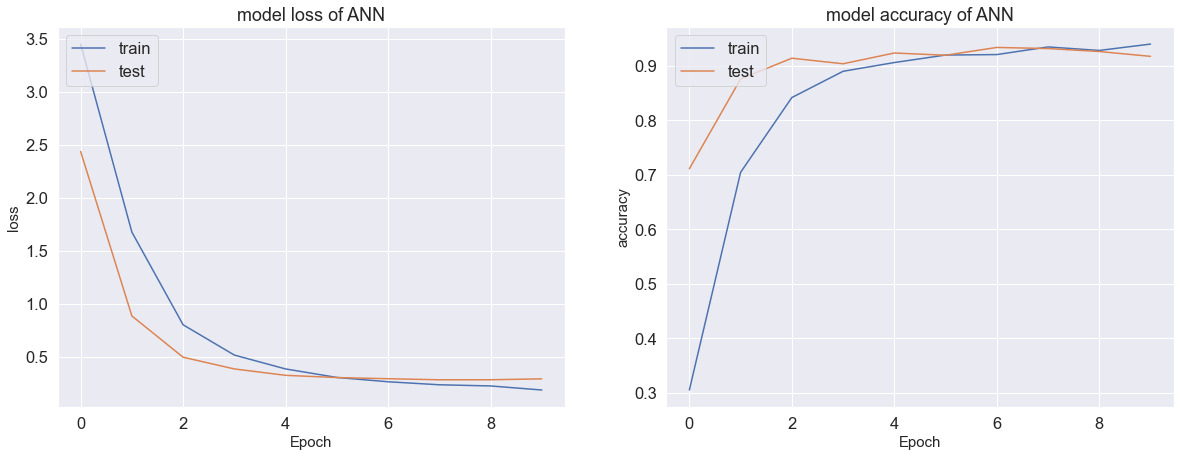

In [70]:
sns.set(font_scale = 1.5)
f,ax = plt.subplots(1,2,figsize=(20,7))

#Creating barplot showing the percentage 
ax[0].plot(history.history['loss'])
ax[0].plot(history.history['val_loss'])
ax[0].set_ylabel('loss',fontsize=15)
ax[0].set_xlabel('Epoch',fontsize=15)
ax[0].set_title("model loss of ANN",fontsize=18)
ax[0].legend(['train', 'test'], loc='upper left')

# Creating barplot showing number of news
ax[1].plot(history.history['accuracy'])
ax[1].plot(history.history['val_accuracy'])
ax[1].set_ylabel("accuracy",fontsize=15)
ax[1].set_xlabel('Epoch',fontsize=15)
ax[1].set_title('model accuracy of ANN',fontsize=18)
ax[1].legend(['train', 'test'], loc='upper left')

#plt.savefig("images/loss_accuracy_vs_epochs_1.pdf", bbox_inches="tight")
plt.show()

In [71]:
inp_shape = XX_train.shape[1:]

model = models.Sequential()
model.add(Dense(64, input_shape =inp_shape , activation='relu'))
model.add(Dense(74, activation='relu'))
model.add(Dropout(0.10))
model.add(Dense(units=50, activation='softmax'))
model.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(), optimizer='adam', metrics=['accuracy'])

model.summary()
# learning_rate_reduction = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss',
#                                             patience=7,
#                                             verbose=2,
#                                             factor=0.5,
#                                             min_lr=0.000001)
# earlyStopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=20, verbose=2, mode='min')

y_train = np.asarray(y_train)
y_test = np.asarray(y_test)
history = model.fit(X_train.toarray(), 
                    y_train, 
                    epochs=20, 
                    validation_data = (X_test.toarray(),  y_test),
                    verbose = 1)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 64)                3628160   
_________________________________________________________________
dense_4 (Dense)              (None, 74)                4810      
_________________________________________________________________
dropout_1 (Dropout)          (None, 74)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 50)                3750      
Total params: 3,636,720
Trainable params: 3,636,720
Non-trainable params: 0
_________________________________________________________________
Train on 3425 samples, validate on 1469 samples
Epoch 1/20
3425/3425 [==============================] - 5s 1ms/sample - loss: 3.2278 - accuracy: 0.4794 - val_loss: 1.8640 - val_accuracy: 0.8162
Epoch 2/20
3425/3425 [==========================

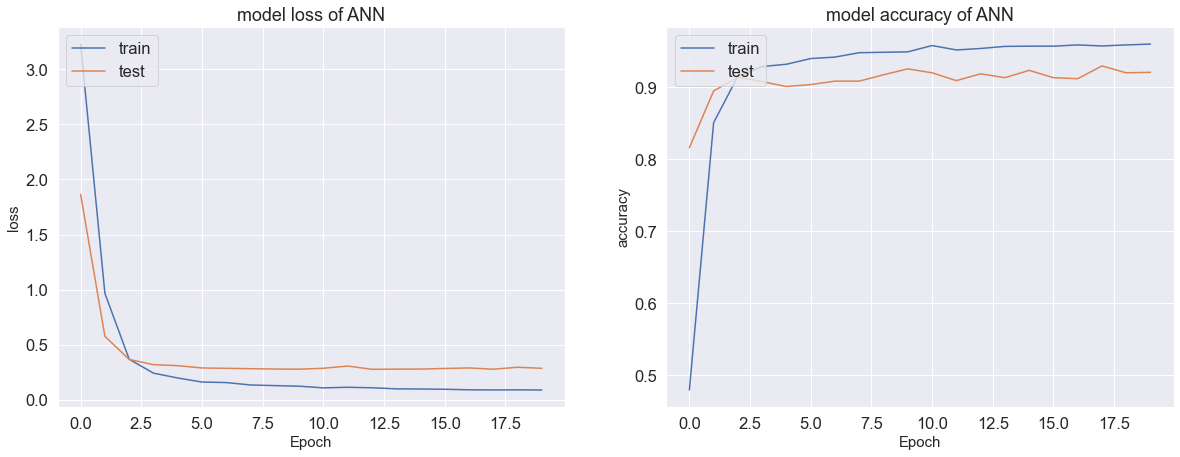

In [72]:
sns.set(font_scale = 1.5)
f,ax = plt.subplots(1,2,figsize=(20,7))

#Creating barplot showing the percentage 
ax[0].plot(history.history['loss'])
ax[0].plot(history.history['val_loss'])
ax[0].set_ylabel('loss',fontsize=15)
ax[0].set_xlabel('Epoch',fontsize=15)
ax[0].set_title("model loss of ANN",fontsize=18)
ax[0].legend(['train', 'test'], loc='upper left')

# Creating barplot showing number of news
ax[1].plot(history.history['accuracy'])
ax[1].plot(history.history['val_accuracy'])
ax[1].set_ylabel("accuracy",fontsize=15)
ax[1].set_xlabel('Epoch',fontsize=15)
ax[1].set_title('model accuracy of ANN',fontsize=18)
ax[1].legend(['train', 'test'], loc='upper left')

#plt.savefig("images/loss_accuracy_vs_epochs_2.pdf", bbox_inches="tight")
plt.show()

#### Clustering - (TruncatedSVD + KMeans)

In [73]:
## backup
#df_cop = df_cop_2.copy()

In [74]:
x_ = []
y_ = []
for x, y in df_cop["class"].value_counts().items():
    #print(x, y)
    x_.append(x)
    y_.append(y)

    # creating dataframe form to draw a bar that shows "system code" vs "number of pdf samples"
#fig, ax = plt.subplots(1, 1, figsize=(20, 8))

word_length = [0]*len(x_)
#print(word_length)

for i, text in enumerate(zip(df_cop["class"], df_cop.clean_text)):
    sys = list(text)[0]
    text = list(text)[1].lower().split()
    
    if sys in x_:
        indx = x_.index(sys)
        #print(sys)
        #print(len(text))
        word_length[indx] += len(text)

In [75]:
df_cop.columns

Index(['text', 'system', 'language', 'class', 'clean_text'], dtype='object')

In [76]:
# gathering the text which are in rich in words
print(word_length)
print(len(word_length))
print(x_)
print(len(x_))

word_length_copy = word_length.copy()
x_copy = x_.copy()
y_copy = y_.copy()

zip_ = list(zip(word_length_copy, x_copy, y_copy))
zip_sorted = reversed(sorted(zip_))

sys = []
for wordlength, system, n_samples in zip_sorted:
    sys.append(system)
    #print(wordlength, system, n_samples)
print(sys)

[218126, 68471, 81899, 172065, 273759, 98730, 189670, 53089, 127400, 56396, 663932, 39965, 52600, 151614, 89443, 713695, 78372, 53422, 82693, 114034, 59344, 49787, 98411, 57601, 108439, 66757, 48074, 75039, 32091, 41115, 63713, 29402, 109196, 86678, 35169, 40680, 41884, 38243, 99980, 321794, 370567, 286342, 45086, 306166, 28243, 34270, 24134, 25621, 20649, 2606]
50
[37, 27, 11, 40, 6, 44, 34, 14, 13, 48, 31, 29, 49, 33, 30, 42, 19, 8, 18, 17, 20, 47, 4, 32, 41, 1, 22, 21, 26, 3, 0, 2, 5, 24, 39, 28, 9, 25, 16, 35, 38, 7, 23, 36, 15, 12, 10, 46, 45, 43]
50
[42, 31, 38, 35, 36, 7, 6, 37, 34, 40, 33, 13, 17, 5, 41, 16, 44, 4, 30, 24, 18, 11, 19, 21, 27, 1, 0, 20, 32, 48, 8, 14, 49, 47, 22, 23, 9, 3, 28, 29, 25, 39, 12, 26, 2, 15, 46, 10, 45, 43]


In [77]:
# Top n most common system code or label:
#df_cop = new_df_copy.copy()
sysCode = list(df_cop["class"].value_counts().keys())
#sysCode = sys.copy()

n = 50
if len(sysCode) > n:
    top_cats = sysCode[:n]
    #top_cats = sys[:n]
    df_cop = df_cop[df_cop["class"].isin(top_cats)]
    sysCode = list(df_cop["class"].value_counts().keys())
    print(sysCode)

In [78]:
df_cop.columns

Index(['text', 'system', 'language', 'class', 'clean_text'], dtype='object')

In [79]:
# Create dictionaries for converting between category and numbers:
sys_to_num = {}
num_to_sys = {}

# Create lists for the text and system codes:
texts = []
labels = []

for i, cat in enumerate(sysCode):
    sys_to_num[cat] = i
    num_to_sys[i] = cat
    
for i, row in df_cop.iterrows():
    texts.append(row["clean_text"])
    labels.append(sys_to_num[row["class"]])


In [80]:
from sklearn.feature_selection import SelectKBest

# Whether text should be split into word or character n-grams.
TOKEN_MODE = 'word'
# Minimum document/corpus frequency below which a token will be discarded.
MIN_DOCUMENT_FREQUENCY = 2
# Creating keyword arguments to pass to the 'tf-idf' vectorizer.
kwargs = {
        'ngram_range': (1,1),  # Use 1-grams + 2-grams.
        'dtype': 'int32',
        'strip_accents': 'unicode',
        'decode_error': 'replace',
        'analyzer': TOKEN_MODE,  # Split text into word tokens.         
        'min_df': MIN_DOCUMENT_FREQUENCY,
}

train_texts, val_texts, train_labels, val_labels = train_test_split(texts, labels, test_size=0.2, random_state=42)

# kwargs is in clustering
vectorizer = TfidfVectorizer(**kwargs)

# having numpy array to work with keras
train_labels  = np.array(train_labels)
val_labels = np.array(val_labels)

x_train = vectorizer.fit_transform(train_texts)
x_val = vectorizer.transform(val_texts)

# TOP_K, f_classif is also declared in the previous cells
TOP_K = 20000
selector = SelectKBest(f_classif, k=min(TOP_K, x_train.shape[1]))
selector.fit(x_train, train_labels)

# Transform x_train and x_val with top 'k' features and convert to numpy:
x_train = selector.transform(x_train).astype('float32').toarray()
x_val = selector.transform(x_val).astype('float32').toarray()

/Users/tt/opt/anaconda3/envs/autility/lib/python3.7/site-packages/sklearn/feature_extraction/text.py:2032: UserWarning: Only (<class 'numpy.float64'>, <class 'numpy.float32'>, <class 'numpy.float16'>) 'dtype' should be used. int32 'dtype' will be converted to np.float64.
  UserWarning,


/Users/tt/opt/anaconda3/envs/autility/lib/python3.7/site-packages/sklearn/feature_extraction/text.py:2032: UserWarning: Only (<class 'numpy.float64'>, <class 'numpy.float32'>, <class 'numpy.float16'>) 'dtype' should be used. int32 'dtype' will be converted to np.float64.
  UserWarning,


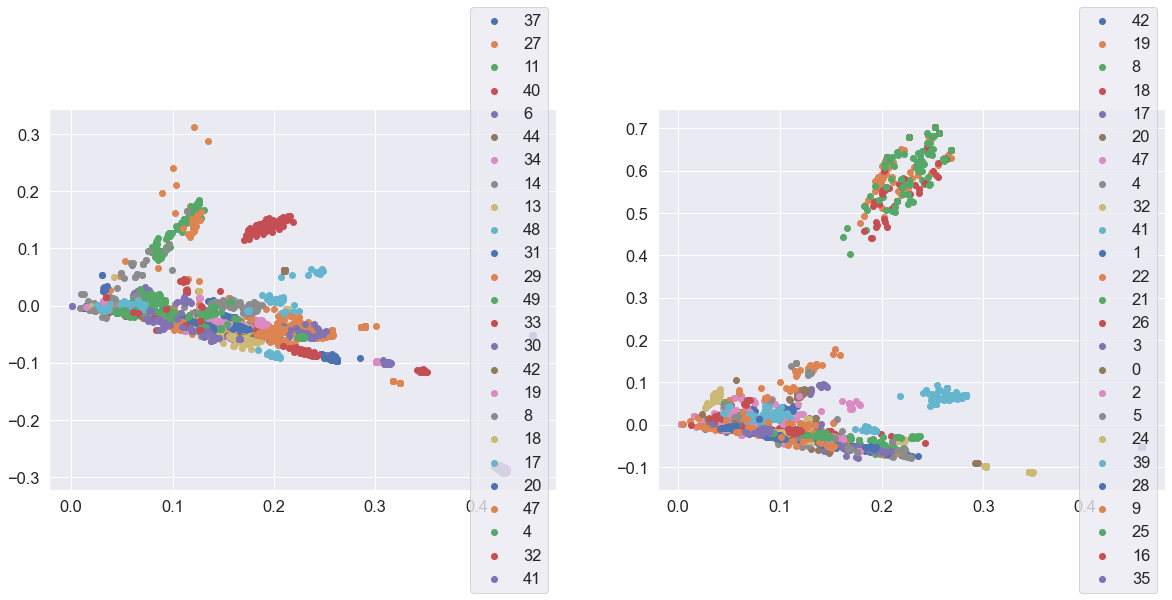

In [81]:
from sklearn.decomposition import TruncatedSVD

vectorizer = TfidfVectorizer(**kwargs)
# Learn vocabulary from training texts and vectorize training texts.
X = vectorizer.fit_transform(texts)
y = np.array(labels)
# Select top 'k' of the vectorized features.
TOP_K = 20000
selector = SelectKBest(f_classif, k=min(TOP_K, X.shape[1]))
selector.fit(X, y)
X = selector.transform(X).astype('float32').toarray() # converting to numpy

# Create a truncated svd model
svd = TruncatedSVD(random_state=42)
# Fit the model to the text-data and transform the text-vectors into 2-dimensional vectors based on the model
x_r = svd.fit_transform(X)


sns.set(font_scale = 1.5)
f,ax = plt.subplots(1,2,figsize=(20,7))

#Creating barplot showing the percentage 
for i, label in zip(range(len(sysCode)//2), sysCode[:25]):
    ax[0].scatter(x_r[y == i, 0], x_r[y == i, 1], label=label) # label=label
ax[0].legend(loc = 'center right')

for i, label in zip(range(len(sysCode)//2), sysCode[15:]):
    ax[1].scatter(x_r[y == i+25, 0], x_r[y == i+25, 1], label=label) # label=label
ax[1].legend(loc = 'center right')

#plt.savefig("./images/df_all_structured_TruncatedSVD.pdf", bbox_inches="tight")
plt.show()

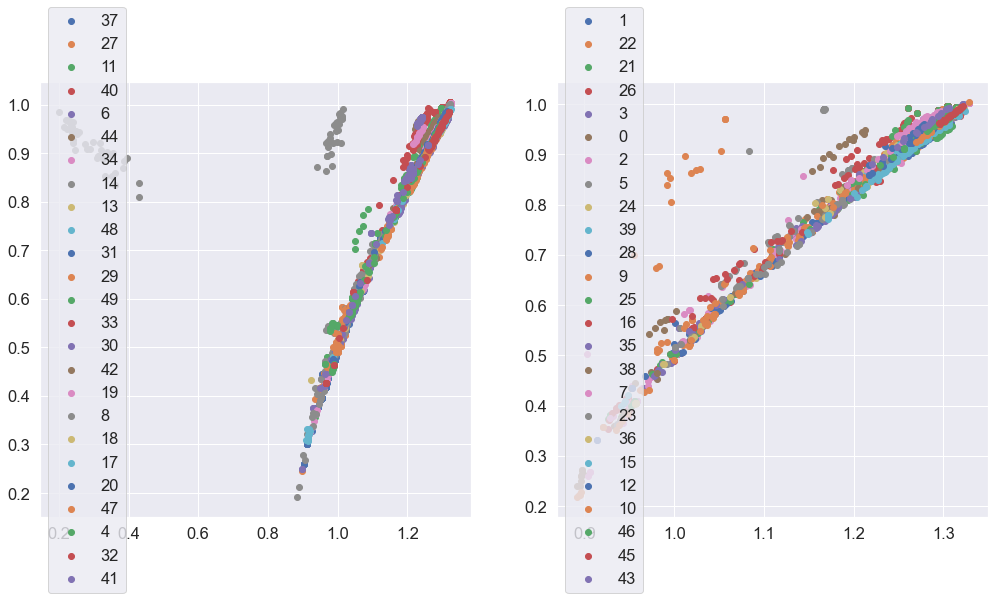

In [82]:
from sklearn.cluster import KMeans
from sklearn.utils import class_weight

# Compute class weight. This is used to make the model more likely to guess that a sample belongs
# to an underrepresented label.
class_weight = class_weight.compute_class_weight('balanced', classes = np.unique(labels), y = labels)

# Create a KMeans model with one cluster per unique system code
km = KMeans(n_clusters=len(sysCode), random_state=42)

# Fit the model to the text-data and transform the text-vectors into 2-dimensional vectors based on the model
x_r2 = km.fit_transform(X, class_weight)

plt.figure(figsize=(17,8))
plt.subplot(1, 2, 1)
# Create a scatter plot of the text-data with different colors for each category/label
for i, label in zip(range(len(sysCode)//2), sysCode[:25]):
    plt.scatter(x_r2[y == i, 0], x_r2[y == i, 1], label=label)
plt.legend(loc = "center left")

plt.subplot(1, 2, 2)
# Create a scatter plot of the text-data with different colors for each category/label
for i, label in zip(range(len(sysCode)//2), sysCode[25:]):
    plt.scatter(x_r2[y == i+25, 0], x_r2[y == i+25, 1], label=label)
plt.legend(loc = "center left")

#plt.savefig("./images/df_all_structured_KMeans.pdf", bbox_inches="tight")

plt.show()


# Working with Unsupervised + Semi-supervised-part

In [166]:
# The structured part from df_three are taken away
df_three = properIndex(df_three)
frames = [df_three, df_four]
unlabeled = pd.concat(frames)
unlabeled = properIndex(unlabeled)
unlabeled.rename(columns={"Text":"text", "Target":"system"}, inplace=True)
unlabeled.drop(['Orginal_Position'], axis=1, inplace =True)


In [167]:
unlabeled.head() # Note the system code in unlabeled dataset include Unclear 2, and Unclear 1

,text,system
0,Rio-Eco N / Z / Therm N - Smedegaard\n\n\n \n\...,Unclear 2
1,Microsoft Word - MonServ UH206-101c.doc\n\n\n ...,Unclear 2
2,All aboard:\nThe ULTRAHEAT UH 50 heat meter \n...,Unclear 2
3,47\n\n•\t Stikkontakter\tfor\tsterk\tog\tsvaks...,Unclear 2
4,1\n\nUser Guide Glamox Integrated Sensor Solut...,Unclear 2


In [168]:
unlabeled.system.unique()

array(['Unclear 2', 'Unclear 1'], dtype=object)

In [169]:
# process of cleaning same as labeled and have clean data
unlabeled = cleaning_dataframeColumns(unlabeled, "text")
unlabeled = cleaner_two(unlabeled)
unlabeled = punctuationsRemoval(unlabeled)
#punctuationsRemoval_two(unlabeled["text"])

In [170]:
# detecting again norwegian and english
unlabeled["language"] = "undefined"
unlabeled = language_detector(unlabeled)
unlabeled = language_excluder_english(unlabeled)
unlabeled = properIndex(unlabeled)

In [171]:
def tokenization(text):
    text = re.split('\W+', text)
    return text
unlabeled["clean_text"] = unlabeled['text'].apply(lambda x: tokenization(x.lower()))

# removing stop words, double-check
def remove_stopwords(text):
    text = [word for word in text if word not in stop_words_no]
    return text
unlabeled.clean_text = unlabeled['clean_text'].apply(lambda x: remove_stopwords(x))

#Stemming 
ps = nltk.PorterStemmer()
def stemming(text):
    text = [ps.stem(word) for word in text]
    return text
unlabeled.clean_text = unlabeled['clean_text'].apply(lambda x: stemming(x))


#Lammitization
def wordLemmatizer(text):
    text = [word_net.lemmatize(word) for word in text]
    return text

unlabeled.clean_text = unlabeled['clean_text'].apply(lambda x: wordLemmatizer(x))
# df.clean_doc= df['clean_doc'].apply(lambda x: lemmatizer(x))
unlabeled.head()



,text,system,language,clean_text
0,rioeco n z therm n smedegaard h yeffektiv varm...,Unclear 2,Norwegian,"[rioeco, n, z, therm, n, smedegaard, h, yeffek..."
1,stikkontakterforsterkogsvakstr m kanalriktigei...,Unclear 2,Norwegian,"[stikkontakterforsterkogsvakstr, m, kanalrikti..."
2,user guide glamox integrated sensor solutionk ...,Unclear 2,Norwegian,"[user, guid, glamox, integr, sensor, solutionk..."
3,wiring diagram masterslaveuser guideuser guide...,Unclear 2,Norwegian,"[wire, diagram, masterslaveus, guideus, guid, ..."
4,stikkontakterqxdstikkontakter wwwwwwrreehhaauu...,Unclear 2,Norwegian,"[stikkontakterqxdstikkontakt, wwwwwwrreehhaauu..."


In [172]:
for i in range(len(unlabeled)):
    unlabeled["clean_text"].iloc[i] = " ".join(unlabeled["clean_text"].iloc[i]) 

In [173]:
labeled = df_cop
labeled.head()

,text,system,language,class,clean_text
0,kro produksjon as tlf wwwkroproduksjonno vedli...,360,Norwegian,37,kro produksjon a tlf wwwkroproduksjonno vedlik...
1,cowerica appdatalocaltemprevitpdf bb kompanjon...,33,Norwegian,11,cowerica appdatalocaltemprevitpdf bb kompanjon...
2,boen sportsgulv slitesterk kontrolloverflaten ...,45,Norwegian,18,boen sportsgulv slitesterk kontrolloverflaten ...
3,norsk prosjekteringsmal n m lestokkrevisjon nr...,22,Norwegian,1,norsk prosjekteringsm n m lestokkrevisjon nr f...
4,environs sertifiseringer innholdsfortegnelse i...,275,Norwegian,32,environ sertifisering innholdsfortegnels innho...


In [174]:
unlabeled["class"] = -1

In [175]:
# Parameters

sdg_params = dict(alpha=1e-5, penalty="l2", loss="log")
vectorizer_params = dict(ngram_range=(1, 1), min_df=1)

In [176]:
# Supervised Pipeline
#pipeline = Pipeline([("vect", CountVectorizer(**vectorizer_params)), ("tfidf", TfidfTransformer()), ("clf", SGDClassifier(**sdg_params)),])
pipeline = Pipeline([("vect", CountVectorizer(**vectorizer_params)), ("tfidf", TfidfTransformer()), ("clf", LinearSVC()),])

# SelfTraining Pipeline
st_pipeline = Pipeline([("vect", CountVectorizer(**vectorizer_params)),("tfidf", TfidfTransformer()),("clf", SelfTrainingClassifier(SVC(probability=True, gamma="auto"), verbose=True)),])

# LabelSpreading Pipeline
ls_pipeline = Pipeline(
    [
        ("vect", CountVectorizer(**vectorizer_params)),
        ("tfidf", TfidfTransformer()),
        # LabelSpreading does not support dense matrices
        ("todense", FunctionTransformer(lambda x: x.todense())),
        ("clf", LabelSpreading()),
    ]
)

def eval_and_print_metrics(clf, X_train, y_train, X_test, y_test):
    print("Number of training samples:", len(X_train))
    print("Unlabeled samples in training set:", sum(1 for x in y_train if x == -1))
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print("Micro-averaged F1 score on test set: %0.3f" % f1_score(y_test, y_pred, average="micro"))
    print("Micro-averaged Precision score: %0.3f" % metrics.precision_score(y_test, y_pred, average="micro"))
    print("Accuracy score: %0.3f" % metrics.accuracy_score(y_test, y_pred))
    print("MSE : %0.3f" % metrics.mean_squared_error(y_test, y_pred))
    print("-" * 10)
    print()
    return clf

In [177]:
if __name__ == "__main__":
    
    X, y = labeled.clean_text, labeled["class"] # here I can use sysCode=> n, where n decided for the number of system codes
    X_train, X_test, y_train, y_test = train_test_split(X, y)

    print("Supervised SGDClassifier on 100% for labeled:")
    pipline = eval_and_print_metrics(pipeline, X_train, y_train, X_test, y_test)
    
    for i in range(len(unlabeled)):
        res = pipline.predict([unlabeled["clean_text"].iloc[i]])[0]
        unlabeled["class"].iloc[i] = res    
    frame_ = [labeled, unlabeled]
    tot_ = pd.concat(frame_)
    tot_ = shuffle(tot_)
    tot_ = properIndex(tot_)
    #sysCode = tot_.system.unique()
    #le = preprocessing.LabelEncoder()
    #tot_['class'] = le.fit_transform(tot_.system.values)
    X_, y_ = tot_.clean_text, tot_["class"]
    X_train, X_test, y_train, y_test = train_test_split(X_, y_)
    

    # select a mask of 20% of the train dataset
    y_mask = np.random.rand(len(y_train)) < 0.2
    
    # X_20 and y_20 are the subset of the train dataset indicated by the mask
    X_20, y_20 = map(list, zip(*((x, y) for x, y, m in zip(X_train, y_train, y_mask) if m)))
    
    print()
    eval_and_print_metrics(pipeline, X_20, y_20, X_test, y_test)

    # set the non-masked subset to be unlabeled
    y_train[~y_mask] = -1
    
    # LABELED AND UNLABELED DATA-SETS
    
    print()
    eval_and_print_metrics(st_pipeline, X_train, y_train, X_test, y_test)

    
    ##y_train = y_train.astype(str)
    #print("LabelSpreading on 20% of the data (rest is unlabeled):")
    #eval_and_print_metrics(ls_pipeline, X_train, y_train, X_test, y_test)

Supervised SGDClassifier on 100% for labeled:
Number of training samples: 3670
Unlabeled samples in training set: 0
Micro-averaged F1 score on test set: 0.918
Micro-averaged Precision score: 0.918
Accuracy score: 0.918
MSE : 9.346
----------



/Users/tt/opt/anaconda3/envs/autility/lib/python3.7/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)



Number of training samples: 1537
Unlabeled samples in training set: 0
Micro-averaged F1 score on test set: 0.741
Micro-averaged Precision score: 0.741
Accuracy score: 0.741
MSE : 65.421
----------


Number of training samples: 7758
Unlabeled samples in training set: 6221
End of iteration 1, added 14 new labels.
Micro-averaged F1 score on test set: 0.107
Micro-averaged Precision score: 0.107
Accuracy score: 0.107
MSE : 242.263
----------



In [178]:
#TRANS.shape

In [190]:
# this step is takeing, because the result from selfclassifier was much lower than expected

TRANS = vectorizer.transform(unlabeled.clean_text)

for i in range(TRANS.shape[0]):
    unlabeled["class"].iloc[i] = clf_NB.predict(TRANS[i])[0]
    

/Users/tt/opt/anaconda3/envs/autility/lib/python3.7/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [191]:
## Import packages and libraries
#import numpy as np
#import random as rnd
#import nltk as nk

#from sklearn.feature_extraction.text import TfidfVectorizer
#from sklearn.model_selection import train_test_split, StratifiedShuffleSplit
#from sklearn.naive_bayes import MultinomialNB
#from sklearn import metrics

#unlabeled["class"] = -1
#frame_ = [labeled, unlabeled]
#tot_ = pd.concat(frame_)
#tot_ = properIndex(tot_)

#tot_.tail()
#print(len(labeled))

In [192]:
# Predict all the unlabeled(temporary) data using the model trained from the supervised, and save the labels in class column of unlabeled part.

In [204]:
# Import packages and libraries
import numpy as np
import random as rnd
import nltk as nk

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics

from Semi_NB import EM_MultinomialNB

#unlabeled["class"] = -1 # labeling the unlabeled with target is equal to -1
frame_ = [labeled, unlabeled] # merging the labeled and unlabeled dat 
tot_ = pd.concat(frame_)
#tot_ = shuffle(tot_)
tot_ = properIndex(tot_) # giving the proper index for both labeled and unlabeled data

tr = tot_[:len(tot_)-2] # This comes from the combination of labeled and unlabeled data sets
tes = tot_[len(tot_)-2:] # This also comes from the labeled and unlabeled data sets us well
#print("tes: ", len(tes))
#The combination of these to makes both train and test data set

# Convert all text data into tf-idf vectors 
vectorizer = TfidfVectorizer(min_df=5) # min_df = 2
# vectorizer = TfidfVectorizer()
train_vec = vectorizer.fit_transform(tr.clean_text)
test_vec = vectorizer.transform(tes.clean_text)
print(train_vec.shape, test_vec.shape)

# Load data set with class labels and split into train and test set
#n_train_data = train_vec.shape[0]
#print("n_train_data: ", n_train_data)
# splits rat


split_ratio = 0.5 # labeled vs unlabeled
X_l, X_u, y_l, y_u = train_test_split(train_vec, tr["class"], train_size = split_ratio) # train_size = split_ratio
print(X_l.shape, y_l.shape,  X_u.shape, y_u.shape)
print("n_train_data - LABELED: ", X_l.shape[0])
print("n_test_data -UNLABELED: ", X_u.shape[0])

# Train Naive Bayes classifier (imported) 
# using labeled data set only
nb_clf = MultinomialNB(alpha=1e-2)
nb_clf.fit(X_l, y_l)


# Evaluate NB classifier using test data set
pred = nb_clf.predict(X_u)
print(metrics.accuracy_score(y_u, pred))
# print(metrics.classification_report(y_u, pred)) # report for the result

print("*"*120)
#em_nb_clf = EM_MultinomialNB() # semi supervised EM based Naive Bayes classifier
em_nb_clf = EM_MultinomialNB()

em_nb_Clf = em_nb_clf.fit(X_l, y_l, X_u)
#em_nb_clf.fit_with_clustering(X_l, y_l, X_u)
#em_nb_clf.partial_fit(X_l, y_l, X_u)

# Evaluate original NB classifier using test data set
pred = em_nb_Clf.predict(X_u)
#print(metrics.classification_report(tes["class"], pred))
print("Score for Unlabeld labele: ", metrics.accuracy_score(y_u, pred))
print(metrics.accuracy_score(y_u, pred))
#print(metrics.classification_report(y_u, pred))
#print(metrics.accuracy_score(y_u, pred)) # report for the result

(10342, 56823) (2, 56823)
(5171, 56823) (5171,) (5171, 56823) (5171,)
n_train_data - LABELED:  5171
n_test_data -UNLABELED:  5171
0.8068071939663508
************************************************************************************************************************
Point 35: 
POINTER 55 Initial expected log likelihood = -13899065.632

EM iteration #1
	Expected log likelihood = -13331700.509
EM iteration #2
	Expected log likelihood = -13274192.458
EM iteration #3
	Expected log likelihood = -13231297.782
EM iteration #4
	Expected log likelihood = -13204758.005
EM iteration #5
	Expected log likelihood = -13191081.291
EM iteration #6
	Expected log likelihood = -13182034.372
EM iteration #7
	Expected log likelihood = -13177415.895
EM iteration #8
	Expected log likelihood = -13175166.484
EM iteration #9
	Expected log likelihood = -13172071.600
EM iteration #10
	Expected log likelihood = -13170736.404
EM iteration #11
	Expected log likelihood = -13168822.057
EM iteration #12
	Expected log

In [210]:
## SAVING THE FINAL MODEL

In [289]:
import pickle
# save the model to disk
filename = 'test_NB_Model.sav'
pickle.dump(nb_clf, open(filename, 'wb'))
 

In [291]:
# some time later...
 
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.predict(transformer)
#accuracy_score(y_test, y_pred)
print(result[0])

31


In [317]:
# manin title
print(pdf_1[0])
transformer = vectorizer.transform([df_one.Text[0]])
loaded_model.predict(transformer)[0]

./TOne/Strukturerte_dokument/Interaxo-download/Nittedal_Ungdomsskole_FDV_7_Utend_rs_2021_02_18_14_20_28/FDV - 7 Utendørs/6 Kontrollert dokumentasjon/+135.01=773.001-VU001T/+135.01=773.001-VU001T_01-Årlig kontroll 04082020.pdf


31

In [301]:
orig_sys = sorted(df_cop["system"].unique())
print(orig_sys, len(orig_sys))
print("*"*120)
enabled_sys = sorted(df_cop["class"].unique())
print(enabled_sys, len(enabled_sys))

[21, 22, 23, 24, 25, 26, 27, 28, 29, 31, 32, 33, 34, 35, 36, 39, 41, 44, 45, 51, 73, 231, 232, 234, 237, 241, 242, 244, 255, 256, 257, 273, 275, 281, 310, 315, 320, 360, 370, 521, 523, 542, 543, 544, 554, 556, 564, 723, 743, 773] 50
************************************************************************************************************************
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49] 50


In [321]:
for i in range(len(enabled_sys)):
    transformer = vectorizer.transform([df_one.Text[0]])
    if enabled_sys[i] == loaded_model.predict(transformer)[0]:
        print(pdf_1[0])
        print(orig_sys[i], enabled_sys[i])

./TOne/Strukturerte_dokument/Interaxo-download/Nittedal_Ungdomsskole_FDV_7_Utend_rs_2021_02_18_14_20_28/FDV - 7 Utendørs/6 Kontrollert dokumentasjon/+135.01=773.001-VU001T/+135.01=773.001-VU001T_01-Årlig kontroll 04082020.pdf
273 31


# Delete

###### ANN to classify

In [ ]:
# converting the labels to numpy before using sklearn
y = np.array(labels)

In [ ]:
train_texts, val_texts, train_labels, val_labels = train_test_split(texts, labels, test_size=0.01, random_state=42)

# kwargs is in clustering
vectorizer = TfidfVectorizer(**kwargs)

# having numpy array to work with keras
train_labels  = np.array(train_labels)
val_labels = np.array(val_labels)

x_train = vectorizer.fit_transform(train_texts)
x_val = vectorizer.transform(val_texts)

# TOP_K, f_classif is also declared in the previous cells
selector = SelectKBest(f_classif, k=min(TOP_K, x_train.shape[1]))
selector.fit(x_train, train_labels)

# Transform x_train and x_val with top 'k' features and convert to numpy:
x_train = selector.transform(x_train).astype('float32').toarray()
x_val = selector.transform(x_val).astype('float32').toarray()



In [ ]:
layers = 2
units = 40
dropout_rate = 0.2

# length expected output classes and input
top_20 = len(sys_to_num)
input_shape = x_train.shape[1:]

#expected output classes
out_units = top_20

# creation of the model
model = models.Sequential()

# Dropout layer to help prevent overfitting
# can include the initial parameters for improvment
model.add(Dense(units=40, activation='relu', 
                input_shape=input_shape))
for i in range(layers-1):
    model.add(Dropout(rate=dropout_rate))
    model.add(Dense(units=units, activation='relu' ))
    
model.add(Dropout(rate=dropout_rate))
model.add(Dense(units=out_units, activation='softmax'))


In [ ]:
from tensorflow.keras import layers
from tensorflow.keras import regularizers

# Hyper parameters:
layers = 2
units = len(train_texts)
dropout_rate = 0.2
input_shape = x_train.shape[1:]

#reg = regularizers.l1(l1=1e-5)
bias_regularizer=regularizers.l2(1e-4)
activity_regularizer=regularizers.l2(1e-5)

top_20 = len(sys_to_num)

# Output cells and activation function
out_units = top_20
activ = 'softmax'

model = models.Sequential()

# Dropout layer to help prevent overfitting:
#model.add(Dropout(rate=dropout_rate, input_shape=input_shape))
model.add(Dense(units=units, activation='relu', input_shape=input_shape))
for _ in range(layers-1):
    model.add(Dropout(rate=dropout_rate))
    model.add(Dense(units=units, activation='relu' ))
    
model.add(Dropout(rate=dropout_rate))
model.add(Dense(units=out_units, activation=activ))

model.summary()

# Seting up hyperparamaters:
learning_rate=1e-3
epochs= 7
batch_size = 500
loss = 'sparse_categorical_crossentropy'
#optimizer = tf.keras.optimizers.Adam(lr=learning_rate)

model.compile(optimizer='Adam', loss=loss, metrics=['acc'])

# Create callback for early stopping on validation loss. If the loss does
# not decrease in two consecutive tries, stop training.
callbacks = [tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=2)]

# Train and validate model.
history = model.fit(
    x_train,
    train_labels,
    epochs = epochs,
    callbacks = callbacks,
    validation_data = (x_val, val_labels),
    verbose = 1,  # Logs once per epoch.
    batch_size = batch_size)

# Print results.
history = history.history

print('Validation accuracy: {acc}, loss: {loss}'.format(
        acc=history['val_acc'][-1], loss=history['val_loss'][-1]))

###### Save ANN Model

In [ ]:
# model of ANN saved as model.h5
#model.save('./model.h5')

In [ ]:
#import tensorflow as tf
#from tf.keras.models import load_model
#model = load_model('./model.h5')

In [ ]:
# records with label taken out in the begining I arrange the index with properIndex
df_three = properIndex(df_three)
frames = [df_three, df_four]
unlabeled = pd.concat(frames)
unlabeled = properIndex(unlabeled)
unlabeled.rename(columns={"Text":"text", "Target":"system"}, inplace=True)
unlabeled.drop(['Orginal_Position'], axis=1, inplace =True)

# Remove punctuations as I did for labeled
for i, text in enumerate(unlabeled["text"]):
    unlabeled["text"][i] = unlabeled["text"][i].lower().strip()
    unlabeled["text"][i] = re.sub("\n+","",unlabeled["text"][i])
    unlabeled["text"][i] = re.sub("\t","",unlabeled["text"][i])
    unlabeled["text"][i] = re.sub(" \d+", "", unlabeled["text"][i]) # removing numbers
    unlabeled["text"][i] = punctuationsRemoval(unlabeled["text"][i])    
    unlabeled["text"][i] = re.sub(r'#', '', unlabeled["text"][i])
    unlabeled["text"][i] = re.sub(r'^RT[\s]+', '', unlabeled["text"][i])
    unlabeled["text"][i] = re.sub(r'\$\w*', '', unlabeled["text"][i])
    unlabeled["text"][i] = re.sub(r'https?:\/\/.*[\r\n]*', '', unlabeled["text"][i])
    
for i, text in enumerate(unlabeled["system"]):
    unlabeled["system"][i] = -1

unlabeled["language"] = None
#unlabeled = language_detector(unlabeled)
#unlabeled = language_excluder(unlabeled)
#unlabeled = properIndex(unlabeled)

labeled = new_df_copy

#### HERE

In [ ]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
# creating encoded system code
labeled['system'] = le.fit_transform(labeled.system.values)

In [ ]:
# Parameters

kwargs = {
        'ngram_range': (1,2),  # Use 1-grams + 2-grams.
        'dtype': 'int32',
        'strip_accents': 'unicode',
        'decode_error': 'replace',
        'analyzer':'word',  # Split text into word tokens.
        'min_df': 2,
}


sdg_params = dict(alpha=1e-5, penalty="l2", loss="log")
vectorizer_params = dict(ngram_range=(1, 2), min_df=1)

In [ ]:
# Supervised Pipeline
#pipeline = Pipeline([("vect", CountVectorizer(**vectorizer_params)), ("tfidf", TfidfTransformer()), ("clf", SGDClassifier(**sdg_params)),])
pipeline = Pipeline([("vect", CountVectorizer(**vectorizer_params)), ("tfidf", TfidfTransformer()), ("clf", LinearSVC()),])

# SelfTraining Pipeline
st_pipeline = Pipeline([("vect", CountVectorizer(**vectorizer_params)),("tfidf", TfidfTransformer()),("clf", SelfTrainingClassifier(SVC(probability=True, gamma="auto"), verbose=True)),])

# LabelSpreading Pipeline
ls_pipeline = Pipeline(
    [
        ("vect", CountVectorizer(**vectorizer_params)),
        ("tfidf", TfidfTransformer()),
        # LabelSpreading does not support dense matrices
        ("todense", FunctionTransformer(lambda x: x.todense())),
        ("clf", LabelSpreading()),
    ]
)

def eval_and_print_metrics(clf, X_train, y_train, X_test, y_test):
    print("Number of training samples:", len(X_train))
    print("Unlabeled samples in training set:", sum(1 for x in y_train if x == -1))
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(
        "Micro-averaged F1 score on test set: %0.3f"
        % f1_score(y_test, y_pred, average="micro")
    )
    print("-" * 10)
    print()
    return clf



In [ ]:
if __name__ == "__main__":
    
    X, y = labeled.text, labeled.system # here I can use sysCode=> n, where n decided for the number of system codes
    X_train, X_test, y_train, y_test = train_test_split(X, y)

    print("Supervised SGDClassifier on 100% for labeled:")
    pipline = eval_and_print_metrics(pipeline, X_train, y_train, X_test, y_test)
    
    for i in range(len(unlabeled)):
        res = pipline.predict([unlabeled.text[i]])[0]
        unlabeled.system[i] = res    
    frame_ = [labeled, unlabeled]
    tot_ = pd.concat(frame_)
    tot_ = shuffle(tot_)
    tot_ = shuffle(tot_)
    tot_ = properIndex(tot_)
    #sysCode = tot_.system.unique()
    le = preprocessing.LabelEncoder()
    tot_['system'] = le.fit_transform(tot_.system.values)
    X_, y_ = tot_.text, tot_.system
    X_train, X_test, y_train, y_test = train_test_split(X_, y_)
    

    # select a mask of 20% of the train dataset
    y_mask = np.random.rand(len(y_train)) < 0.2
    
    # X_20 and y_20 are the subset of the train dataset indicated by the mask
    X_20, y_20 = map(list, zip(*((x, y) for x, y, m in zip(X_train, y_train, y_mask) if m)))
    
    print()
    eval_and_print_metrics(pipeline, X_20, y_20, X_test, y_test)

    # set the non-masked subset to be unlabeled
    y_train[~y_mask] = -1
    
    # LABELED AND UNLABELED DATA-SETS
    
    print()
    eval_and_print_metrics(st_pipeline, X_train, y_train, X_test, y_test)

    
    ##y_train = y_train.astype(str)
    #print("LabelSpreading on 20% of the data (rest is unlabeled):")
    #eval_and_print_metrics(ls_pipeline, X_train, y_train, X_test, y_test)

    
    

###### Tesst EM V-2

In [ ]:
# Import packages and libraries
import numpy as np
import random as rnd
import nltk as nk

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics

unlabeled.system = -1
frame_ = [labeled, unlabeled]
tot_ = pd.concat(frame_)
tot_ = shuffle(tot_)


tr = tot_[:500] # This comes from the combination of labeled and unlabeled data sets
tes = tot_[500:] # This also comes from the labeled and unlabeled data sets us well
#The combination of these to makes both train and test data set

# Convert all text data into tf-idf vectors 
vectorizer = TfidfVectorizer(stop_words=stop_words, min_df=0, max_df=0.9) # min_df = 2
# vectorizer = TfidfVectorizer()
train_vec = vectorizer.fit_transform(tr.text)
test_vec = vectorizer.transform(tes.text)
print(train_vec.shape, test_vec.shape)

# Divide train data set into labeled and unlabeled data sets
n_train_data = train_vec.shape[0]
# splits rat
split_ratio = 0.2 # labeled vs unlabeled
X_l, X_u, y_l, y_u = train_test_split(train_vec, tr.system, train_size = split_ratio) # train_size = split_ratio
print(X_l.shape, y_l.shape,  X_u.shape, y_u.shape)

# Train Naive Bayes classifier (imported) 
# using labeled data set only
nb_clf = MultinomialNB(alpha=1e-2)
nb_clf.fit(X_l, y_l)


from copy import deepcopy
from scipy.sparse import csr_matrix, vstack
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from scipy.linalg import get_blas_funcs
from sklearn.semi_supervised import LabelPropagation, LabelSpreading

class New_EM_MultinomialNB():

    def __init__(self, alpha=1.0, fit_prior=True, class_prior=None, max_iter=30, tol=1e-6, print_log_lkh=True):
        self.alpha = alpha
        self.fit_prior = fit_prior
        self.class_prior = class_prior
        self.clf = MultinomialNB(alpha=self.alpha, fit_prior=self.fit_prior, class_prior=self.class_prior) # 1, True, None
        self.log_lkh = -np.inf # log likelihood
        self.max_iter = max_iter # max number of EM iterations
        self.tol = tol # tolerance of log likelihood increment
        self.feature_log_prob_ = np.array([]) # Empirical log probability of features given a class, P(x_i|y).
        self.coef_ = np.array([]) # Mirrors feature_log_prob_ for interpreting MultinomialNB as a linear model.
        self.print_log_lkh = print_log_lkh # if True, print log likelihood during EM iterations

    def fit(self, X_l, y_l, X_u):
        """
        Initialize the parameter using labeled data only.
        Assume unlabeled class as missing values, apply EM on unlabeled data to refine classifier.
        """
        print("Point 35: ")
        n_ul_docs = X_u.shape[0] # number of unlabeled samples   ->
        n_l_docs = X_l.shape[0]  # number of labeled samples
        
        # initialization (n_docs = n_ul_docs)
        clf = deepcopy(self.clf)# build new copy of classifier
        
        clf.fit(X_l, y_l) # use labeled data only to initialize classifier parameters
        prev_log_lkh = self.log_lkh # record log likelihood of previous EM iteration ---> -np.inf
        lp_w_c = clf.feature_log_prob_ # log CP of word given class [n_classes, n_words]
        b_w_d = (X_u > 0) # words in each document [n_docs, n_words]
        lp_d_c = get_blas_funcs("gemm", [lp_w_c, b_w_d.T.toarray()]) # log CP of doc given class [n_classes, n_docs]
        lp_d_c = lp_d_c(alpha=1.0, a=lp_w_c, b=b_w_d.T.toarray()) 
        lp_c = np.matrix(clf.class_log_prior_).T # log prob of classes [n_classes, 1]
        lp_c = np.repeat(lp_c, n_ul_docs, axis=1) # repeat for each doc [n_classes, n_docs]
        lp_dc = lp_d_c + lp_c # joint prob of doc and class [n_classes, n_docs]
        p_c_d = clf.predict_proba(X_u) # weight of each class in each doc [n_docs, n_classes]
        expectation = get_blas_funcs("gemm", [p_c_d, lp_dc]) # expectation of log likelihood over all unlabeled docs
        expectation = expectation(alpha=1.0, a=p_c_d, b=lp_dc).trace() 
        self.clf = deepcopy(clf)
        self.log_lkh = expectation
        if self.print_log_lkh:
            print("POINTER 55 Initial expected log likelihood = %0.3f\n" % expectation)
        # Loop until log likelihood does not improve
        iter_count = 0 # count EM iteration
        while (self.log_lkh-prev_log_lkh>=self.tol and iter_count<self.max_iter):
        # while (iter_count<self.max_iter):
            iter_count += 1
            if self.print_log_lkh:
                print("EM iteration #%d" % iter_count) # debug
            # E-step: Estimate class membership of unlabeled documents
            y_u = clf.predict(X_u)
            # M-step: Re-estimate classifier parameters
            X = vstack([X_l, X_u])
            y = np.concatenate((y_l, y_u), axis=0)
            clf.fit(X, y)
            # check convergence: update log likelihood
            p_c_d = clf.predict_proba(X_u)
            lp_w_c = clf.feature_log_prob_ # log CP of word given class [n_classes, n_words]
            b_w_d = (X_u > 0) # words in each document
            lp_d_c = get_blas_funcs("gemm", [lp_w_c, b_w_d.transpose().toarray()]) # log CP of doc given class [n_classes, n_docs]
            lp_d_c = lp_d_c(alpha=1.0, a=lp_w_c, b=b_w_d.transpose().toarray()) 
            lp_c = np.matrix(clf.class_log_prior_).T # log prob of classes [n_classes, 1]
            lp_c = np.repeat(lp_c, n_ul_docs, axis=1) # repeat for each doc [n_classes, n_docs]
            lp_dc = lp_d_c + lp_c  # joint prob of doc and class [n_classes, n_docs]
            expectation = get_blas_funcs("gemm", [p_c_d, lp_dc]) # expectation of log likelihood over all unlabeled docs
            expectation = expectation(alpha=1.0, a=p_c_d, b=lp_dc).trace() 
            if self.print_log_lkh:
                print("\tExpected log likelihood = %0.3f" % expectation)
            if (expectation-self.log_lkh >= self.tol):
                prev_log_lkh = self.log_lkh
                self.log_lkh = expectation
                self.clf = deepcopy(clf)
            else:
                break
        self.feature_log_prob_ = self.clf.feature_log_prob_
        self.coef_ = self.clf.coef_
        return self
    
    def partial_fit(self, X_l, y_l, X_u=np.array([])):
        
        n_ul_docs = X_u.shape[0] # number of unlabeled samples
        n_l_docs = X_l.shape[0] # number of labeled samples
        # initialization (n_docs = n_ul_docs)
        clf = deepcopy(self.clf)# build new copy of classifier
        clf.partial_fit(X_l, y_l) # use labeled data only to initialize classifier parameters
        prev_log_lkh = self.log_lkh # record log likelihood of previous EM iteration
        lp_w_c = clf.feature_log_prob_ # log CP of word given class [n_classes, n_words]
        b_w_d = (X_u > 0) # words in each document [n_docs, n_words]
        lp_d_c = get_blas_funcs("gemm", [lp_w_c, b_w_d.T.toarray()]) # log CP of doc given class [n_classes, n_docs]
        lp_d_c = lp_d_c(alpha=1.0, a=lp_w_c, b=b_w_d.T.toarray()) 
        lp_c = np.matrix(clf.class_log_prior_).T # log prob of classes [n_classes, 1]
        lp_c = np.repeat(lp_c, n_ul_docs, axis=1) # repeat for each doc [n_classes, n_docs]
        lp_dc = lp_d_c + lp_c # joint prob of doc and class [n_classes, n_docs]
        p_c_d = clf.predict_proba(X_u) # weight of each class in each doc [n_docs, n_classes]
        expectation = get_blas_funcs("gemm", [p_c_d, lp_dc]) # expectation of log likelihood over all unlabeled docs
        expectation = expectation(alpha=1.0, a=p_c_d, b=lp_dc).trace() 
        self.clf = deepcopy(clf)
        self.log_lkh = expectation
        print("POINTER 188 Initial expected log likelihood = %0.3f\n" % expectation)
        # Loop until log likelihood does not improve
        iter_count = 0 # count EM iteration
        while (self.log_lkh-prev_log_lkh>=self.tol and iter_count<self.max_iter):
        # while (iter_count<self.max_iter):
            iter_count += 1
            print("EM iteration #%d" % iter_count) # debug
            # E-step: Estimate class membership of unlabeled documents
            y_u = clf.predict(X_u)
            # M-step: Re-estimate classifier parameters
            X = vstack([X_l, X_u])
            y = np.concatenate((y_l, y_u), axis=0)
            clf.partial_fit(X, y)
            # check convergence: update log likelihood
            p_c_d = clf.predict_proba(X_u)
            lp_w_c = clf.feature_log_prob_ # log CP of word given class [n_classes, n_words]
            b_w_d = (X_u > 0) # words in each document
            lp_d_c = get_blas_funcs("gemm", [lp_w_c, b_w_d.transpose().toarray()]) # log CP of doc given class [n_classes, n_docs]
            lp_d_c = lp_d_c(alpha=1.0, a=lp_w_c, b=b_w_d.transpose().toarray()) 
            lp_c = np.matrix(clf.class_log_prior_).T # log prob of classes [n_classes, 1]
            lp_c = np.repeat(lp_c, n_ul_docs, axis=1) # repeat for each doc [n_classes, n_docs]
            lp_dc = lp_d_c + lp_c  # joint prob of doc and class [n_classes, n_docs]
            expectation = get_blas_funcs("gemm", [p_c_d, lp_dc]) # expectation of log likelihood over all unlabeled docs
            expectation = expectation(alpha=1.0, a=p_c_d, b=lp_dc).trace() 
            print("\tExpected log likelihood = %0.3f" % expectation)
            if (expectation-self.log_lkh >= self.tol):
                prev_log_lkh = self.log_lkh
                self.log_lkh = expectation
                self.clf = deepcopy(clf)
            else:
                break
        self.feature_log_prob_ = self.clf.feature_log_prob_
        self.coef_ = self.clf.coef_
        return self
    
    
    def predict(self, X):
        return self.clf.predict(X)

    def score(self, X, y):
        return self.clf.score(X, y)

    def get_params(deep=True):
        return self.clf.get_params(deep)

    def __str__(self):
        return self.clf.__str__()

        
# Train Naive Bayes classifier (imported) 
# using both labeled and unlabeled data set
from Semi_NB import EM_MultinomialNB

#em_nb_clf = EM_MultinomialNB() # semi supervised EM based Naive Bayes classifier
em_nb_clf = New_EM_MultinomialNB()


em_nb_Clf = em_nb_clf.fit(X_l, y_l, X_u)
# em_nb_clf.fit_with_clustering(X_l, y_l, X_u)
#em_nb_clf.partial_fit(X_l, y_l, X_u)

# Evaluate original NB classifier using test data set
pred = em_nb_Clf.predict(test_vec)
print(metrics.classification_report(tes.system, pred))
print(metrics.accuracy_score(tes.system, pred))

In [2403]:
print("*"*120)

************************************************************************************************************************


In [ ]:
# the whle loop is included in the word agumentation function
#while len(system_code_with_less_samples) > 0:
#    for i, sys in enumerate(system_code_with_less_samples[:]):
#        try:
#            new_df = agumentation_systemCode(new_df, sys, min_length_words = 100, number_samples_to_add = 20, number_word_to_change = 50)
#            print(i, sys)
#        except:
#            print("not preformed: ", sys)
#            
#    system_codes_number_samples = list(new_df["system"].value_counts()) # the number of samples from max to min
#    system_codes = list(new_df["system"].value_counts().keys()) # system code that belong to the samples
#    for n_samples, sys_cod in zip(system_codes_number_samples, system_codes):
#        if n_samples < 80  and n_samples > 60:
#            #print(sys_cod, type(sys_cod), n_samples, type(n_samples))
#            system_code_with_less_samples.append(sys_cod)

###### From this below will be deleted

In [ ]:
# Example how the agumentation of the texts work

from nltk.tokenize import word_tokenize
aug = naw.SynonymAug()

text_ = "robust båsgarderobe utførelse robust båsgarderobe er utført med skrog i laminat"
text_ = word_tokenize(text_)
print(text_)

random_words = []
index_agumented_word = []
agumented_words = []

if len(text_) > 5:
    while len(random_words) < 5:
        w = random.choice(text_)
        if w not in random_words:
            # translate to english
            translated_word_en = translator.translate(w, dest="en")
            print(translated_word_en.text)
            # do agumentation on the translated data
            agumented_data = aug.augment(translated_word_en.text)
            print("Agumented: ", agumented_data)
            # translate back to the origin
            translated_word_origin = translator.translate(agumented_data, dest="no")
            agumented_words.append(translated_word_origin.text)
            #print(w)
            random_words.append(w)
            
for w in random_words:
    idx = text_.index(w)
    index_agumented_word.append(idx)

for i, y in zip(index_agumented_word, agumented_words):
        text_[i] = y

print(index_agumented_word) 
print(text_)
print(agumented_words)

In [ ]:
# test
text_ = "robust båsgarderobe utførelse robust båsgarderobe er utført med skrog i laminat"
aug = naw.SynonymAug()
for word in nlp(text_):
    agumented_data = aug.augment(str(word))
    print(agumented_data)

In [ ]:
text_ = "robust båsgarderobe utførelse robust båsgarderobe er utført med skrog i laminat"
text_ = nlp(text_)
for i in range(10):
    print(random.choice(text_))

In [ ]:
# Sentence Agumentation, takes time to run
#aug = nas.ContextualWordEmbsForSentenceAug(model_path='xlnet-base-cased') # model_path="gpt2"
#augmented_texts = aug.augment(all_original_labeled.text[1], n=3)
#print(augmented_texts[0])
#print()
#print(augmented_texts[1])
#print()
#print(augmented_texts[2])
#print()


# HardCoded BackUp

In [2404]:
len(labeled)

4894

In [2186]:
for d in NS3451.Veiledning[:5]:
    print(d)

Omfatter bygningsmessige deler
Omfatter byggegrop; grunnforsterkning og fundamenter.
Omfatter alle deler av tomten som berøres av byggearbeidene og inkluderer -fjerning av vegetasjon- beskyttelse av vegetasjon - avtaking av vekstjord; - fjerning av bygningsrester i grunnen
Omfatter sprengning; graving; fylling inklusive grøfter for bunnledninger; samt bærelag og avrettet underlag for gulv på grunn.
Omfatter injisering; masseutskifting el. for bygning og dens umiddelbare nærhet.
